### Modeling

In [1]:
# Clear the R environment
rm(list=ls())

In [2]:
# Import libraries
library(dplyr, warn.conflicts=FALSE)
library(ggplot2, warn.conflicts=FALSE)
library(corrplot, warn.conflicts=FALSE)
library(tidyr, warn.conflicts=FALSE)
library(tseries, warn.conflicts=FALSE)
library(vars, warn.conflicts=FALSE)
library(mgcv, warn.conflicts=FALSE)
library(rugarch, warn.conflicts=FALSE)
library(aod, warn.conflicts=FALSE)
library(TSA, warn.conflicts=FALSE)
library(dynlm, warn.conflicts=FALSE)
library(reshape2, warn.conflicts=FALSE)
library(greybox, warn.conflicts=FALSE)
library(mlr, warn.conflicts=FALSE)
library(lubridate, warn.conflicts=FALSE)

corrplot 0.92 loaded

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-42. For overview type 'help("mgcv-package")'.

Loading required package: parallel

Package "greybox", v1.0.8 loaded.


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the fo

In [3]:
# Read the cleaned data
data = read.csv('../data/cleaned_data.csv')

# Drop the 'X' column
data = data[, -1]

# View the data
glimpse(data)

Rows: 400
Columns: 16
$ date                     <chr> "1990-01-01", "1990-02-01", "1990-03-01", "19…
$ arrivals_domestic        <int> 290, 283, 294, 271, 273, 288, 271, 262, 291, …
$ arrivals_international   <int> 233, 232, 228, 230, 244, 256, 263, 263, 248, …
$ arrivals_ontime          <dbl> 0.7812592, 0.7700386, 0.7999271, 0.8206158, 0…
$ arrivals_delayed         <dbl> 0.2035139, 0.2156863, 0.1889942, 0.1731370, 0…
$ arrivals_cancelled       <dbl> 0.013836018, 0.012388219, 0.008892128, 0.0058…
$ arrivals_passengers      <int> 1627316, 1495792, 1718599, 1643042, 1719822, …
$ departures_domestic      <int> 276, 280, 278, 266, 264, 274, 265, 266, 279, …
$ departures_international <int> 248, 251, 264, 252, 261, 270, 280, 273, 267, …
$ departures_ontime        <dbl> 0.8357600, 0.8185993, 0.8653221, 0.8893992, 0…
$ departures_delayed       <dbl> 0.15157251, 0.17082172, 0.12593075, 0.1056374…
$ departures_cancelled     <dbl> 0.012667443, 0.010578973, 0.008747199, 0.0049…
$ departures_passe

In [4]:
# Time series of full data
monthly_ts = ts(data[, -c(1)], freq=12, start=c(1990,01,01))

# Random train/test split of full data
train = ts(data[1:394, -c(1)], freq=12, start=c(1990,01,01))
test = ts(data[395:400, -c(1)], freq=12, start=c(1990,01,01))

In [5]:
# Individual time series - training data
arrivals_domestic = ts(data[1:394, c(2)], freq=12, start=c(1990,01,01))
arrivals_international = ts(data[1:394, c(3)], freq=12, start=c(1990,01,01))
arrivals_ontime = ts(data[1:394, c(4)], freq=12, start=c(1990,01,01))
arrivals_delayed = ts(data[1:394, c(5)], freq=12, start=c(1990,01,01))
arrivals_cancelled = ts(data[1:394, c(6)], freq=12, start=c(1990,01,01))

arrivals_passengers = ts(data[1:394, c(7)], freq=12, start=c(1990,01,01))
departures_domestic = ts(data[1:394, c(8)], freq=12, start=c(1990,01,01))
departures_international = ts(data[1:394, c(9)], freq=12, start=c(1990,01,01))
departures_ontime = ts(data[1:394, c(10)], freq=12, start=c(1990,01,01))
departures_delayed = ts(data[1:394, c(11)], freq=12, start=c(1990,01,01))

departures_cancelled = ts(data[1:394, c(12)], freq=12, start=c(1990,01,01))
departures_passengers = ts(data[1:394, c(13)], freq=12, start=c(1990,01,01))
temp = ts(data[1:394, c(14)], freq=12, start=c(1990,01,01))
precipitation = ts(data[1:394, c(15)], freq=12, start=c(1990,01,01))
during_covid = ts(data[1:394, c(16)], freq=12, start=c(1990,01,01))

### Trends Between Domestic and International Flights

In [6]:
# Full data
f_arrivals_domestic = ts(data[, c(2)], freq=12, start=c(1990,01,01))
f_arrivals_international = ts(data[, c(3)], freq=12, start=c(1990,01,01))

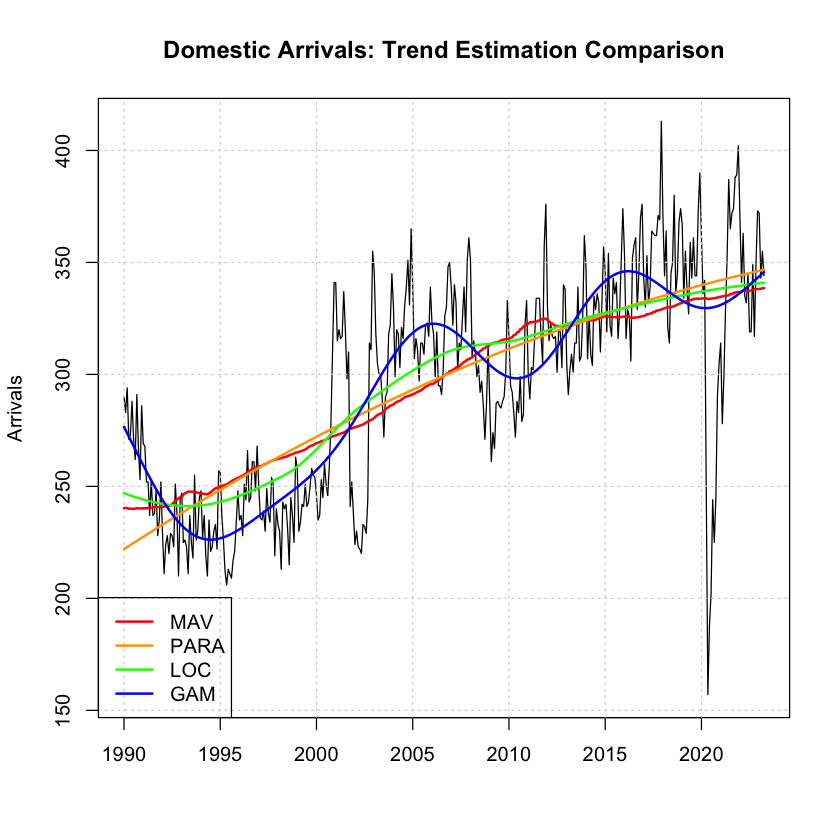

In [7]:
### Domestic Arrivals

# Moving average
points_1 <- 1:length(f_arrivals_domestic)
points_1 <- (points_1 - min(points_1)) / max(points_1)
mav_model_1 <- ksmooth(points_1, f_arrivals_domestic, kernel='box')
mav_fit_1 <- ts(mav_model_1$y, start=c(1990,01,01), frequency=12)

# Parametric quadratic polynomial
x1_1 <- points_1
x2_1 <- points_1^2
para_model_1 <- lm(f_arrivals_domestic~x1_1+x2_1)
para_fit_1 <- ts(fitted(para_model_1), start=c(1990,01,01), frequency = 12)

# Local polynomial
loc_model_1 <- loess(f_arrivals_domestic~points_1)
loc_fit_1 <- ts(fitted(loc_model_1), start=c(1990,01,01), frequency=12)

# Splines
gam_model_1 <- gam(f_arrivals_domestic ~ s(points_1))
gam_fit_1 <- ts(fitted(gam_model_1), start = c(1990,01,01), frequency = 12)

# Plots
ts.plot(f_arrivals_domestic, xlab = "", ylab = "Arrivals", 
        main = "Domestic Arrivals: Trend Estimation Comparison")
grid()
lines(mav_fit_1, lwd = 2, col = "red")
lines(para_fit_1, lwd = 2,col = "orange")
lines(loc_fit_1, lwd = 2,col = "green")
lines(gam_fit_1, lwd = 2,col = "blue")
legend("bottomleft", legend = c("MAV", "PARA", "LOC", "GAM"),
col = c("red", "orange", "green", "blue"), lwd = 2)

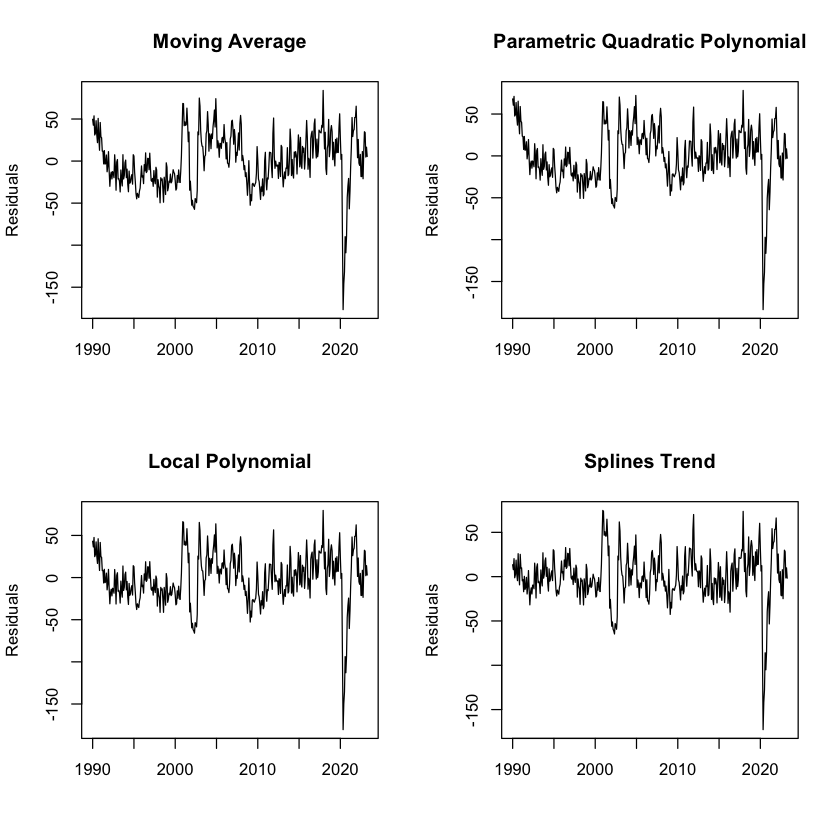

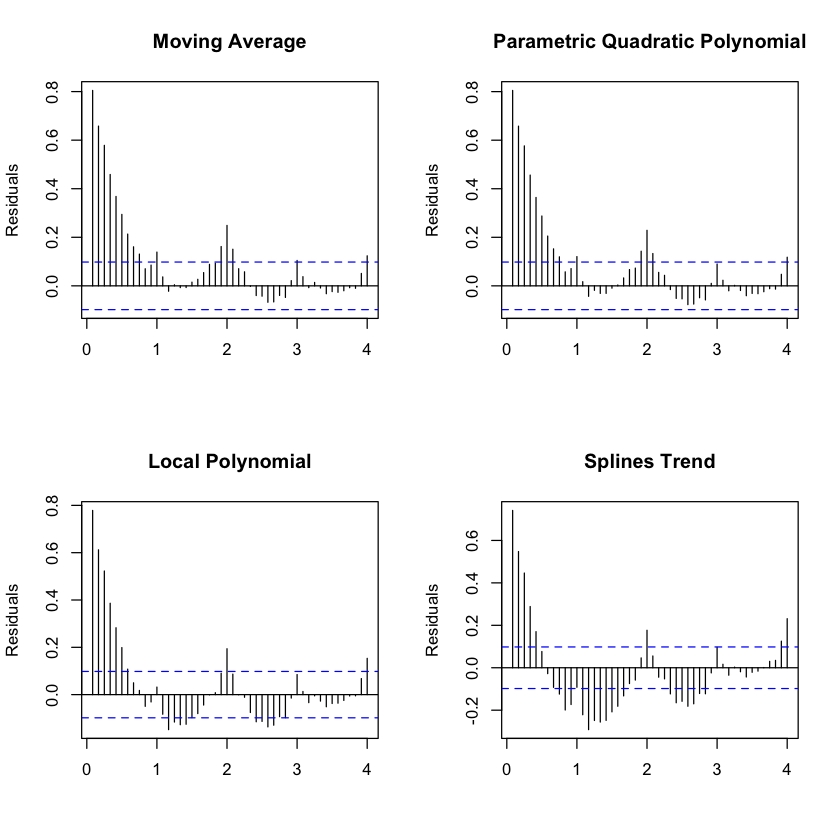

In [8]:
### Domestic Arrivals

# Residual plots
diff_mav_1 <- f_arrivals_domestic - mav_fit_1
diff_para_1 <- f_arrivals_domestic - para_fit_1
diff_loc_1 <- f_arrivals_domestic - loc_fit_1
diff_gam_1 <- f_arrivals_domestic - ts(fitted(gam_model_1), start = c(1990,01,01), frequency = 12)
par(mfrow = c(2, 2))
ts.plot(diff_mav_1, xlab = "", ylab = "Residuals", main = "Moving Average")
ts.plot(diff_para_1, xlab = "", ylab = "Residuals", main = "Parametric Quadratic Polynomial")
ts.plot(diff_loc_1, xlab = "", ylab = "Residuals", main = "Local Polynomial")
ts.plot(diff_gam_1, xlab = "", ylab = "Residuals", main = "Splines Trend")

# ACF plots of residuals
par(mfrow = c(2, 2))
acf(diff_mav_1, lag.max = 12 * 4, xlab = "", ylab = "Residuals", main = "Moving Average")
acf(diff_para_1, lag.max = 12 * 4, xlab = "", ylab = "Residuals", main = "Parametric Quadratic Polynomial")
acf(diff_loc_1, lag.max = 12 * 4, xlab = "", ylab = "Residuals", main = "Local Polynomial")
acf(diff_gam_1, lag.max = 12 * 4, xlab = "", ylab = "Residuals", main = "Splines Trend")

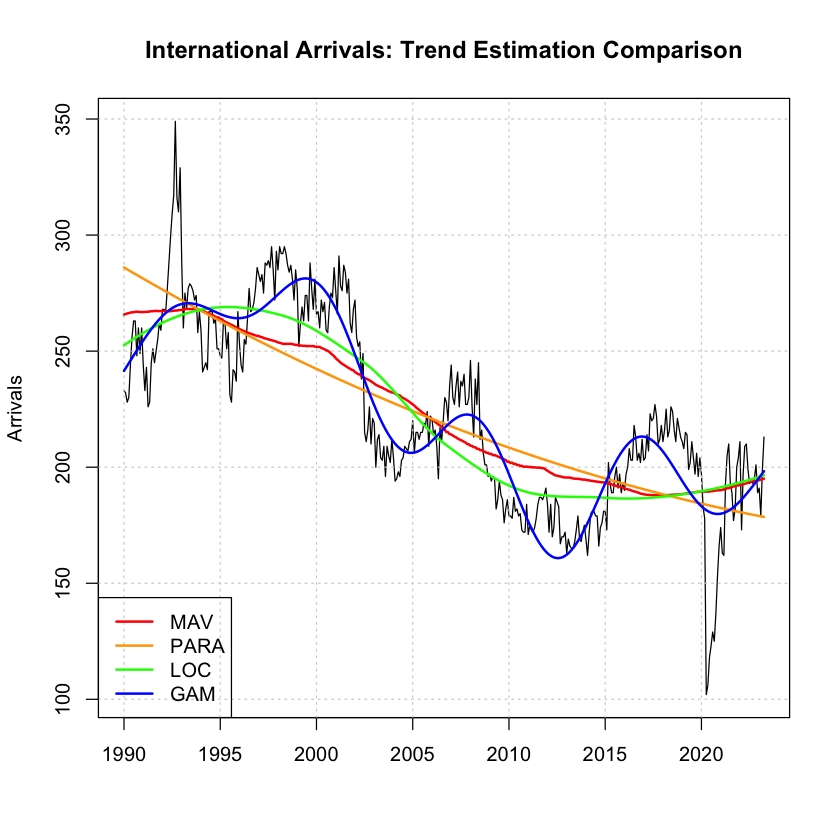

In [9]:
### International Arrivals

# Moving average
points_2 <- 1:length(f_arrivals_international)
points_2 <- (points_2 - min(points_2)) / max(points_2)
mav_model_2 <- ksmooth(points_2, f_arrivals_international, kernel='box')
mav_fit_2 <- ts(mav_model_2$y, start=c(1990,01,01), frequency=12)

# Parametric quadratic polynomial
x1_2 <- points_2
x2_2 <- points_2^2
para_model_2 <- lm(f_arrivals_international~x1_2+x2_2)
para_fit_2 <- ts(fitted(para_model_2), start=c(1990,01,01), frequency = 12)

# Local polynomial
loc_model_2 <- loess(f_arrivals_international~points_2)
loc_fit_2 <- ts(fitted(loc_model_2), start=c(1990,01,01), frequency=12)

# Splines
gam_model_2 <- gam(f_arrivals_international ~ s(points_2))
gam_fit_2 <- ts(fitted(gam_model_2), start = c(1990,01,01), frequency = 12)

# Plots
ts.plot(f_arrivals_international, xlab = "", ylab = "Arrivals", 
        main = "International Arrivals: Trend Estimation Comparison")
grid()
lines(mav_fit_2, lwd = 2, col = "red")
lines(para_fit_2, lwd = 2,col = "orange")
lines(loc_fit_2, lwd = 2,col = "green")
lines(gam_fit_2, lwd = 2,col = "blue")
legend("bottomleft", legend = c("MAV", "PARA", "LOC", "GAM"),
col = c("red", "orange", "green", "blue"), lwd = 2)

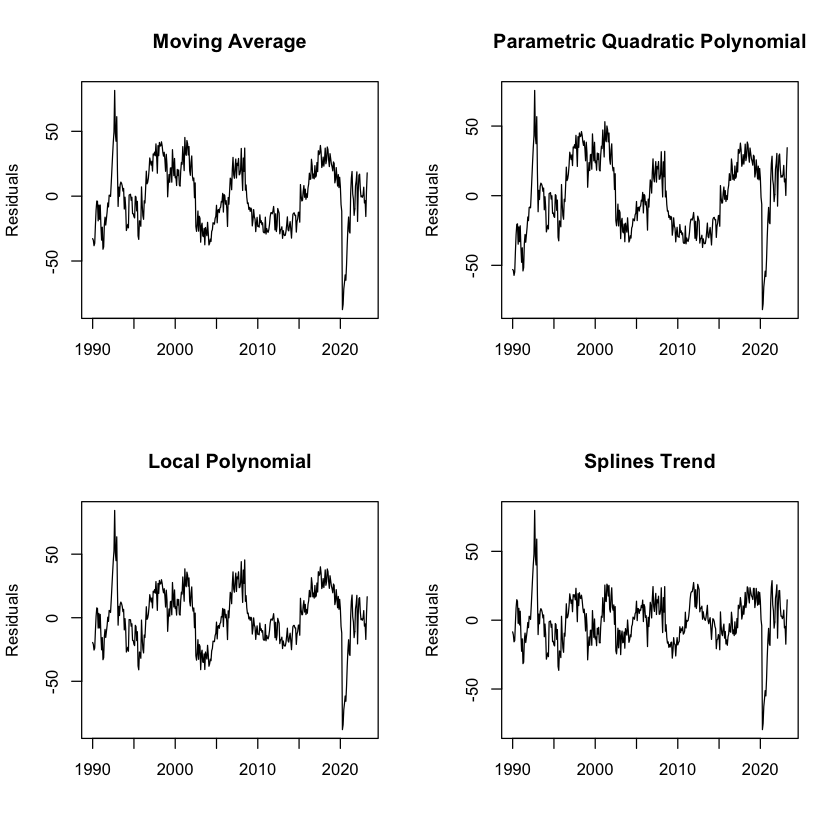

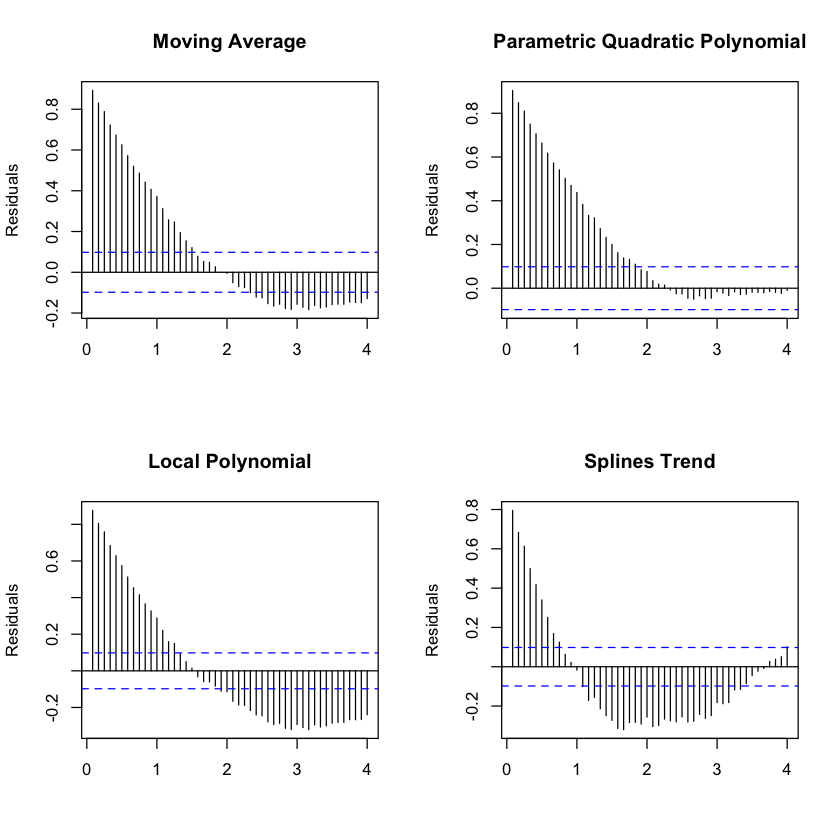

In [10]:
### International Arrivals

# Residual plots
diff_mav_2 <- f_arrivals_international - mav_fit_2
diff_para_2 <- f_arrivals_international - para_fit_2
diff_loc_2 <- f_arrivals_international - loc_fit_2
diff_gam_2 <- f_arrivals_international - ts(fitted(gam_model_2), start = c(1990,01,01), frequency = 12)
par(mfrow = c(2, 2))
ts.plot(diff_mav_2, xlab = "", ylab = "Residuals", main = "Moving Average")
ts.plot(diff_para_2, xlab = "", ylab = "Residuals", main = "Parametric Quadratic Polynomial")
ts.plot(diff_loc_2, xlab = "", ylab = "Residuals", main = "Local Polynomial")
ts.plot(diff_gam_2, xlab = "", ylab = "Residuals", main = "Splines Trend")

# ACF plots of residuals
par(mfrow = c(2, 2))
acf(diff_mav_2, lag.max = 12 * 4, xlab = "", ylab = "Residuals", main = "Moving Average")
acf(diff_para_2, lag.max = 12 * 4, xlab = "", ylab = "Residuals", main = "Parametric Quadratic Polynomial")
acf(diff_loc_2, lag.max = 12 * 4, xlab = "", ylab = "Residuals", main = "Local Polynomial")
acf(diff_gam_2, lag.max = 12 * 4, xlab = "", ylab = "Residuals", main = "Splines Trend")

### Univariate ARIMA

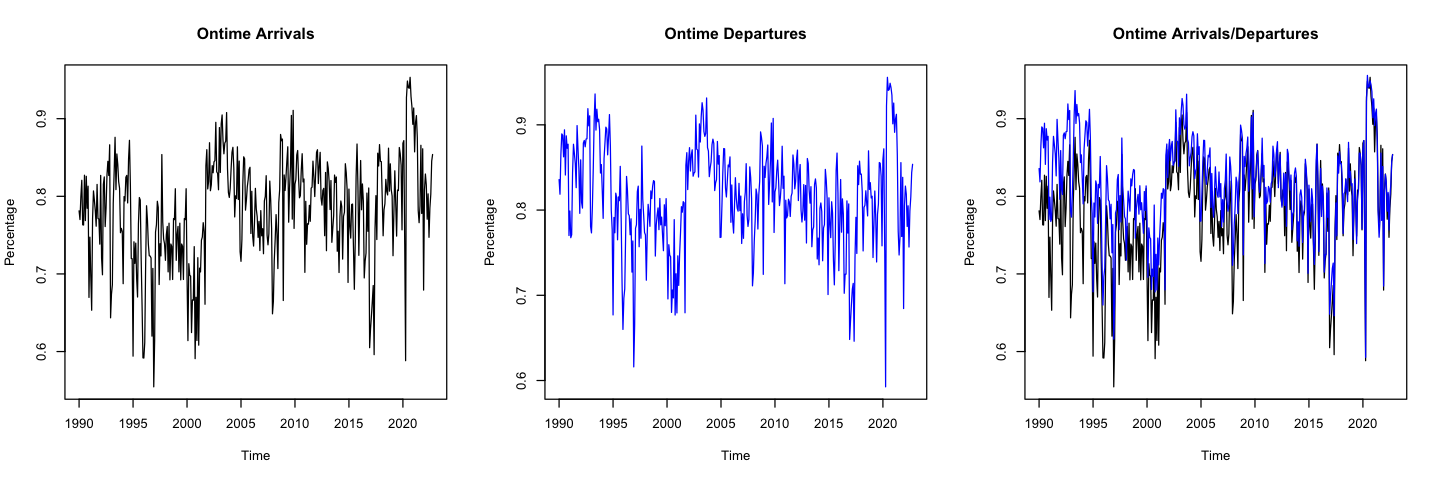

In [11]:
### Response variables: (1) arrivals_ontime and (2) departures_ontime

### Original time series plots
options(repr.plot.width = 12, repr.plot.height=4)
par(mfrow=c(1,3))

# Time series plot 1
ts.plot(arrivals_ontime, type='l', col='black', ylab='Percentage', main='Ontime Arrivals')

# Time series plot 2
ts.plot(departures_ontime, type='l', col='blue', ylab='Percentage', main='Ontime Departures')

# Combined time series plot
ts.plot(arrivals_ontime, type='l', col='black', ylab='Percentage', main='Ontime Arrivals/Departures')
lines(departures_ontime, type='l', col='blue', ylab='Percentage')

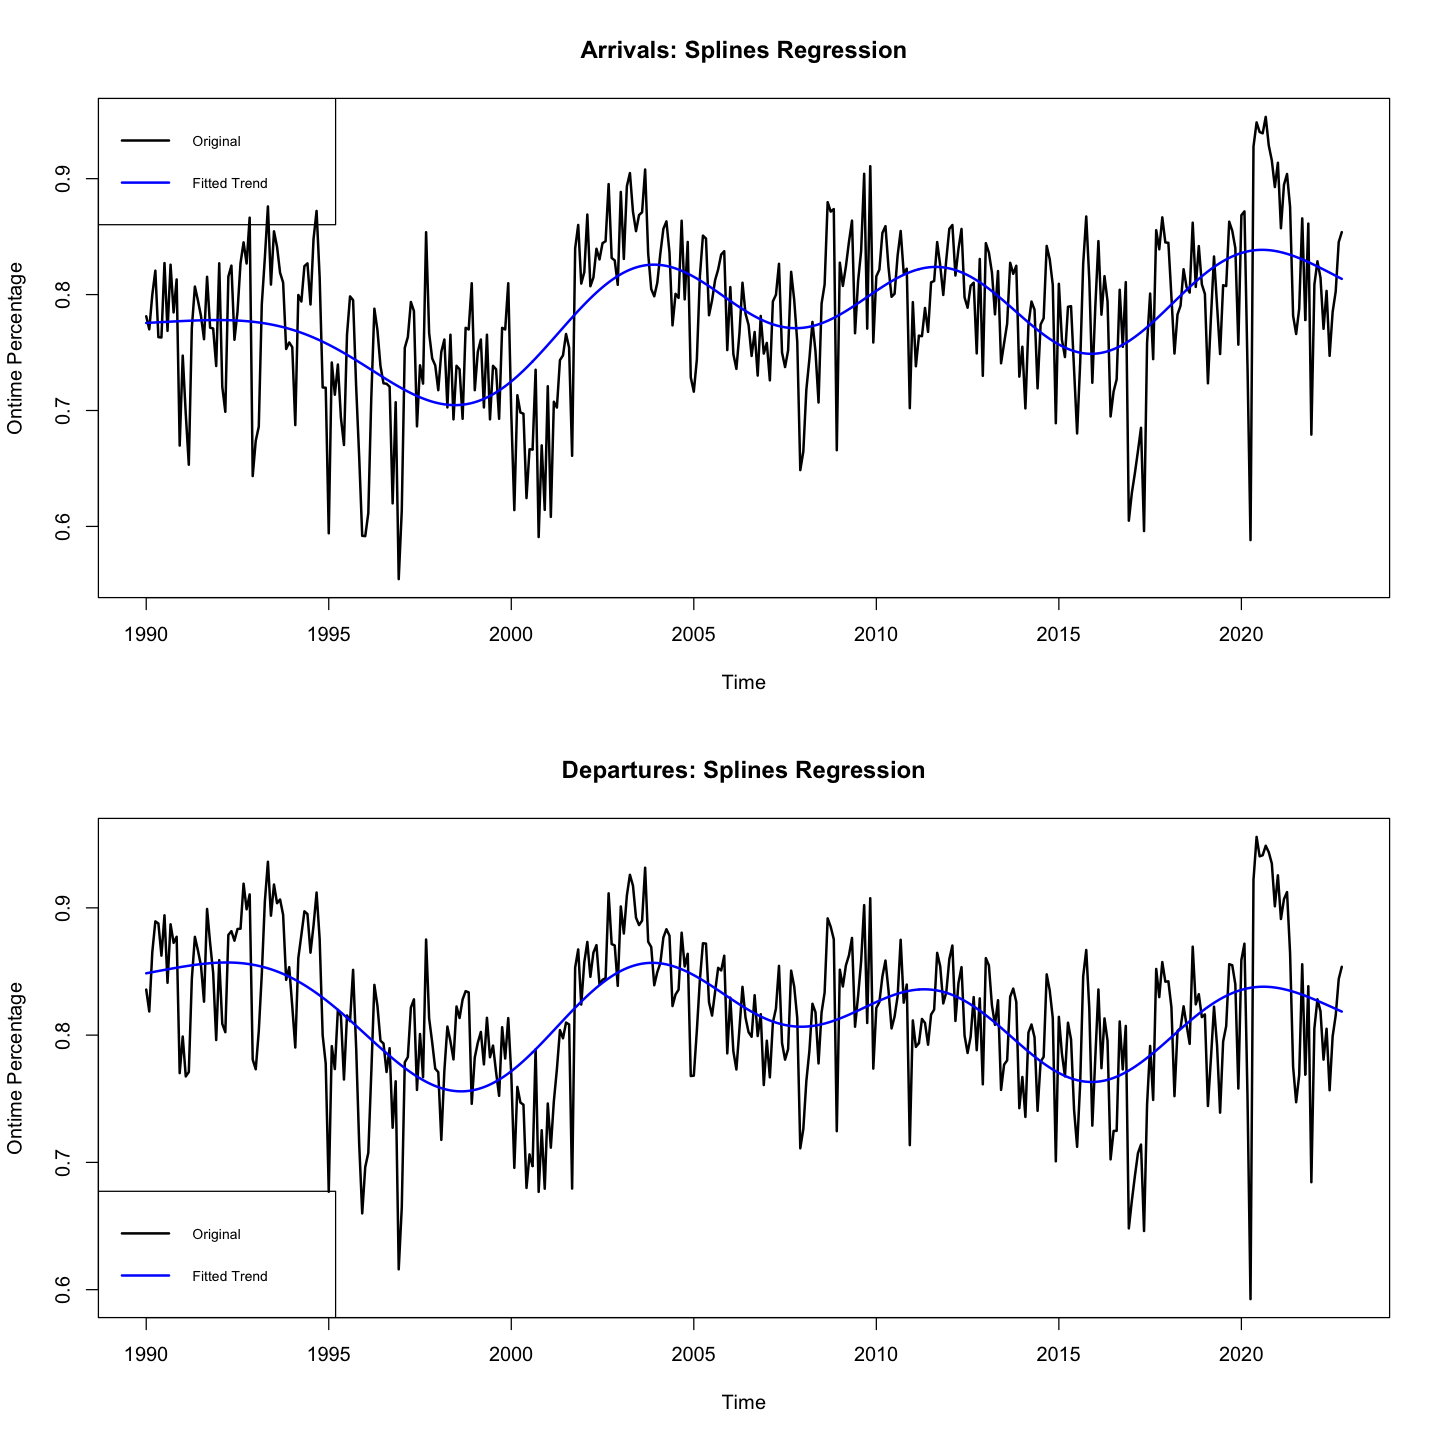

In [12]:
### Fit a non-parametric trend using splines regression
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(2,1))

# arrivals_ontime
time_pts_1 = c(1:length(arrivals_ontime))
time_pts_1 = c(time_pts_1 - min(time_pts_1)) / max(time_pts_1)
a_splines = gam(arrivals_ontime~s(time_pts_1))
a_fitted = ts(fitted(a_splines), start=c(1990,01,01), freq=12)

# departures_ontime
time_pts_2 = c(1:length(departures_ontime))
time_pts_2 = c(time_pts_2 - min(time_pts_2)) / max(time_pts_2)
d_splines = gam(departures_ontime~s(time_pts_2))
d_fitted = ts(fitted(d_splines), start=c(1990,01,01), freq=12)

# Plot fitted trends 1
plot.ts(arrivals_ontime, col='black', type='l', lwd=2,
    xlab='Time', ylab='Ontime Percentage', main='Arrivals: Splines Regression') 
lines(a_fitted, col='blue', type='l', lwd=2)
legend('topleft', legend=c('Original', 'Fitted Trend'), lwd=2, col=c('black', 'blue'),
      cex=0.7)

# Plot fitted trends 2
plot(departures_ontime, col='black', type='l', lwd=2,
    xlab='Time', ylab='Ontime Percentage', main='Departures: Splines Regression') 
lines(d_fitted, col='blue', type='l', lwd=2)
legend('bottomleft', legend=c('Original', 'Fitted Trend'), lwd=2, col=c('black', 'blue'),
      cex=0.7)

In [13]:
### Train/test split

# arrivals_ontime
a_train = ts(data[1:394, c(4)], freq=12, start=c(1990,01,01))
a_test = ts(data[395:400, c(4)], freq=12, start=c(2022,01,11))

# departures_ontime
d_train = ts(data[1:394, c(10)], freq=12, start=c(1990,11,01))
d_test = ts(data[395:400, c(10)], freq=12, start=c(2022,11,01))

In [14]:
### ARIMA

# arrivals_ontime
test_modelA <- function(p,d,q){
  mod = arima(a_train, order=c(p,d,q), method="ML")
  current.bic = BIC(mod)
  df = data.frame(p,d,q,current.bic)
  names(df) <- c("p","d","q","BIC")
  return(df)
}

orders_1 = data.frame(Inf,Inf,Inf,Inf)
names(orders_1) <- c("p","d","q","BIC")

for (p in 0:8){
    for (d in 0:1){
        for (q in 0:8) {
          possibleError <- tryCatch(
            orders_1<-rbind(orders_1, test_modelA(p,d,q)),
            error=function(e) e
          )
          if(inherits(possibleError, "error")) next
        }
    }
}
orders_1 <- orders_1[order(-orders_1$BIC),]
tail(orders_1, 10)

# ARIMA(2,0,1)

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in log(s2):
“NaNs produced”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, season

,p,d,q,BIC
,<dbl>,<dbl>,<dbl>,<dbl>
39,2,0,1,-1157.836
67,3,1,2,-1158.104
50,2,1,3,-1158.106
40,2,0,2,-1158.419
42,2,0,4,-1158.702
33,1,1,4,-1158.750
41,2,0,3,-1159.780
87,4,1,4,-1160.460
58,3,0,2,-1163.363


In [15]:
# departures_ontime
test_modelD <- function(p,d,q){
  mod = arima(d_train, order=c(p,d,q), method="ML")
  current.bic = BIC(mod)
  df = data.frame(p,d,q,current.bic)
  names(df) <- c("p","d","q","BIC")
  return(df)
}

orders_2 = data.frame(Inf,Inf,Inf,Inf)
names(orders_2) <- c("p","d","q","BIC")

for (p in 0:8){
    for (d in 0:1){
        for (q in 0:8) {
          possibleError <- tryCatch(
            orders_2<-rbind(orders_2,test_modelD(p,d,q)),
            error=function(e) e
          )
          if(inherits(possibleError, "error")) next
        }
    }
}
orders_2 <- orders_2[order(-orders_2$BIC),]
tail(orders_2, 10)

# ARIMA(2,0,1)

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in log(s2):
“NaNs produced”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”
Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible conv

,p,d,q,BIC
,<dbl>,<dbl>,<dbl>,<dbl>
96,5,0,4,-1304.682
58,3,0,2,-1305.024
39,2,0,1,-1305.045
115,6,0,5,-1305.782
123,6,1,4,-1307.364
131,7,0,3,-1309.916
97,5,0,5,-1311.900
79,4,0,5,-1313.768
113,6,0,3,-1314.955


In [16]:
### Display the summary of the final model fit

# arrivals_ontime
a_arima = arima(a_train, order=c(2,0,1), method='ML')
a_arima
cat('----------------------------------------')

# departures_ontime
d_arima = arima(d_train, order=c(2,0,1), method='ML')
d_arima


Call:
arima(x = a_train, order = c(2, 0, 1), method = "ML")

Coefficients:
          ar1     ar2     ma1  intercept
      -0.3647  0.6332  0.9865     0.7819
s.e.   0.0393  0.0392  0.0100     0.0073

sigma^2 estimated as 0.002861:  log likelihood = 593.86,  aic = -1179.72

----------------------------------------


Call:
arima(x = d_train, order = c(2, 0, 1), method = "ML")

Coefficients:
          ar1     ar2     ma1  intercept
      -0.3364  0.6629  0.9911     0.8145
s.e.   0.0376  0.0376  0.0075     0.0066

sigma^2 estimated as 0.001966:  log likelihood = 667.46,  aic = -1326.93

**Order Selection:**

- arrivals_ontime: ARIMA(2,0,1)
- departures_ontime: ARIMA(2,0,1)

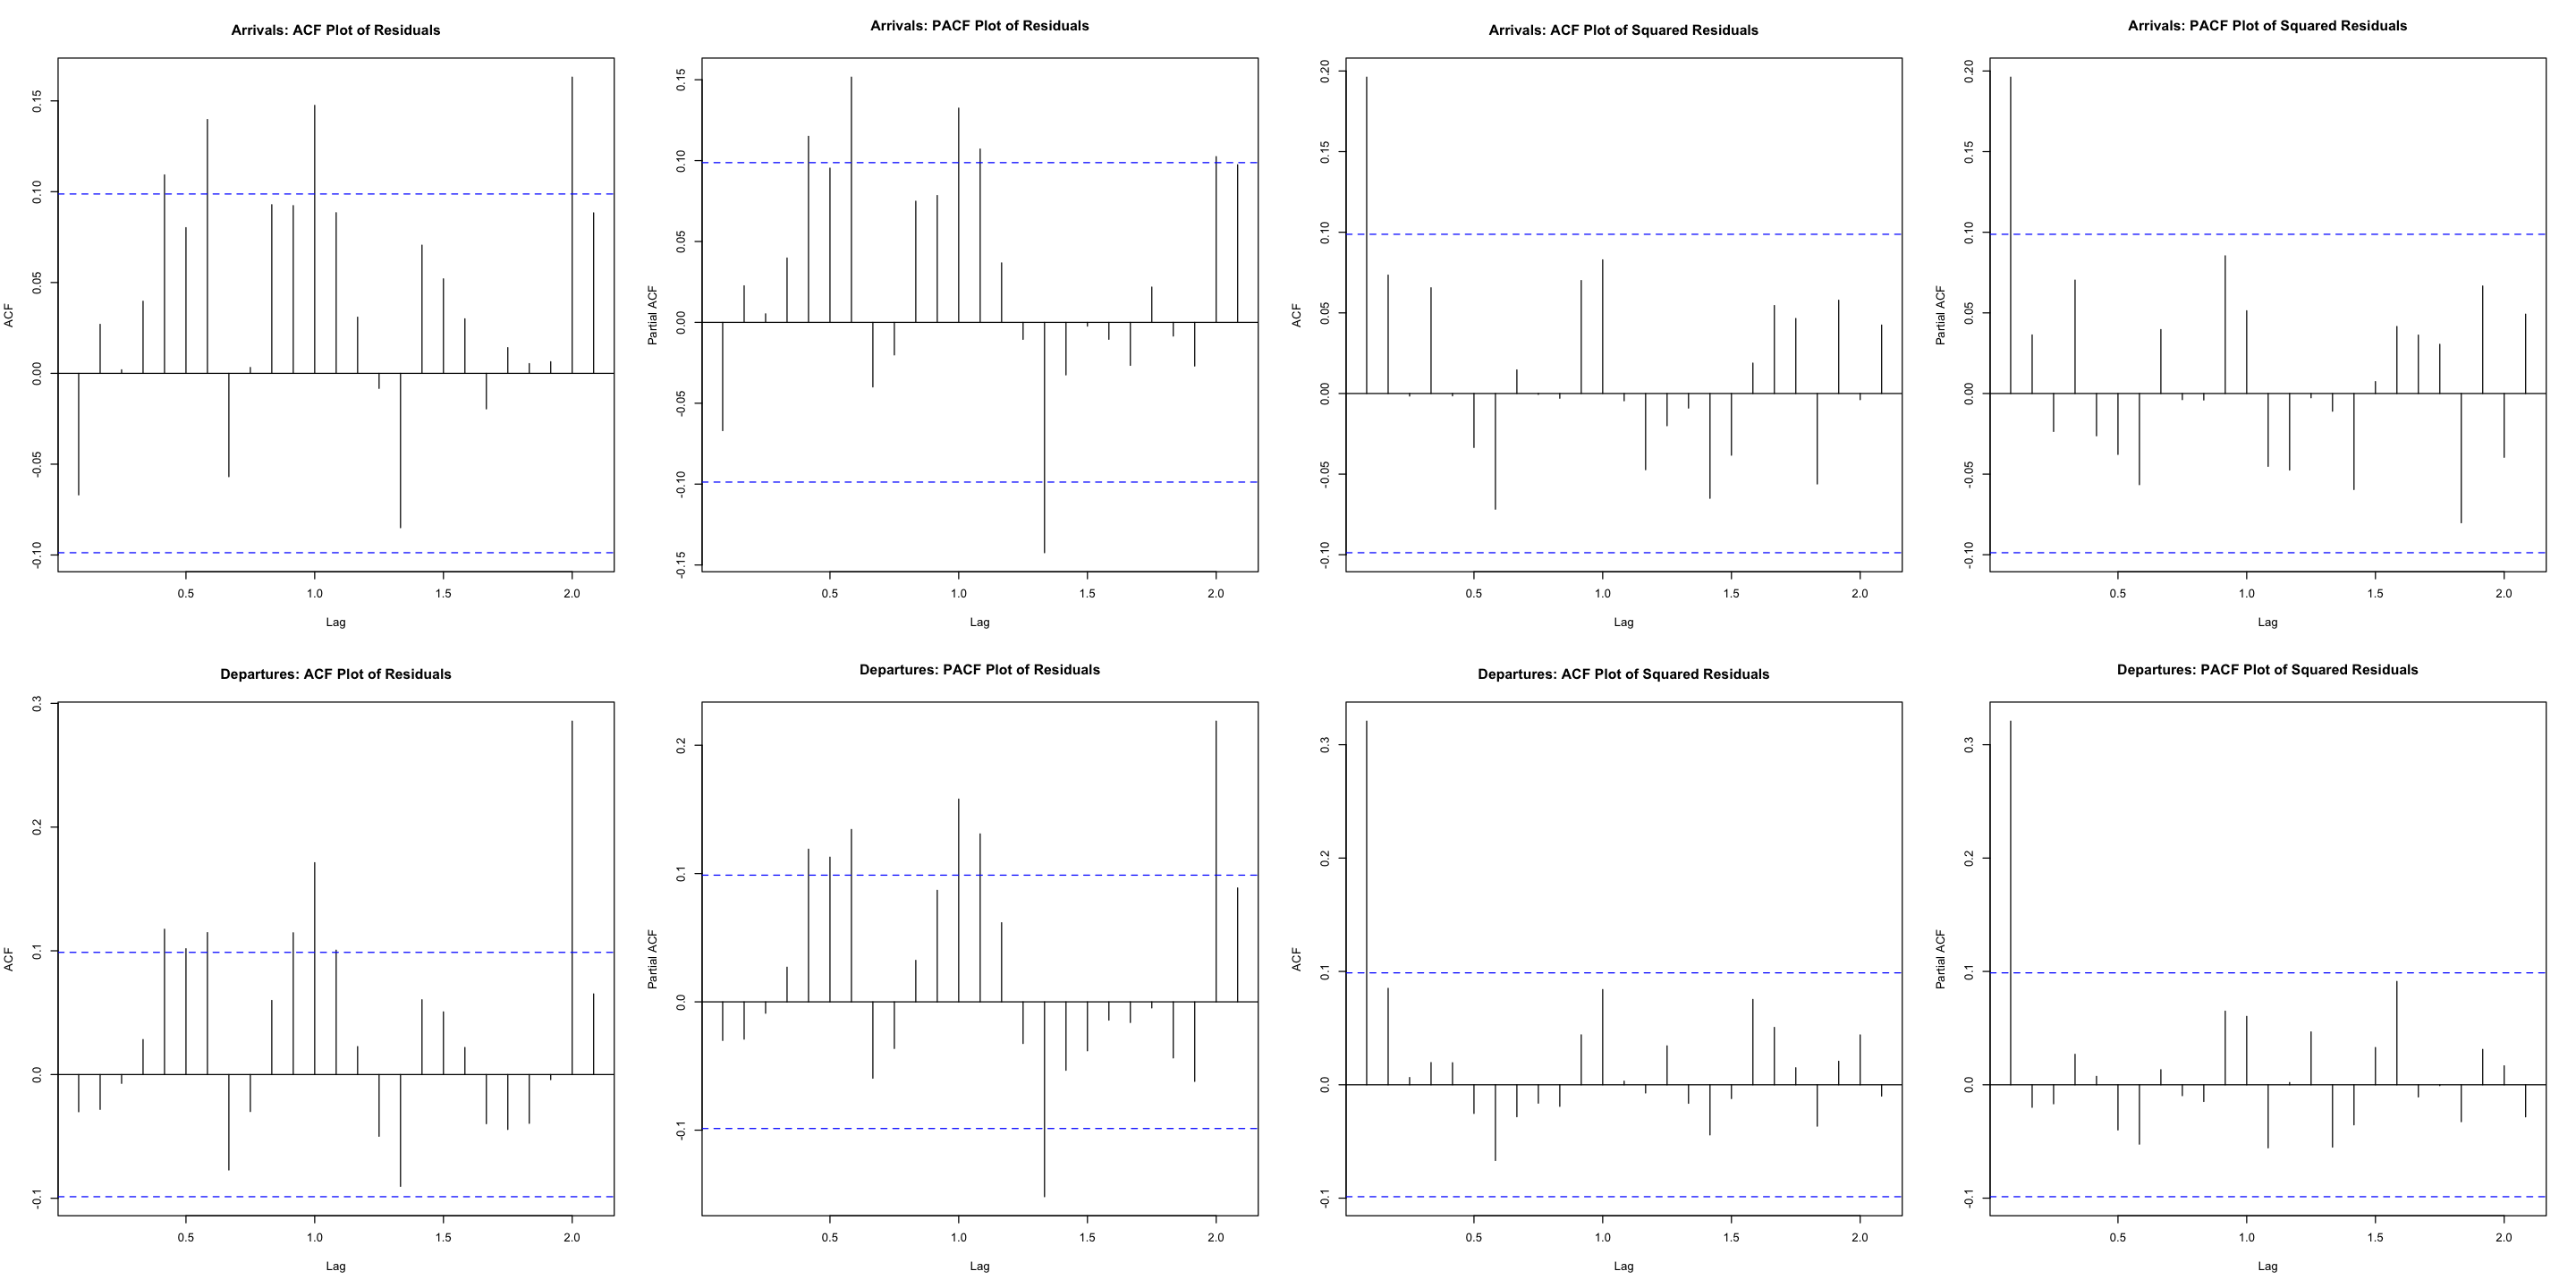

In [17]:
### Residual analysis
options(repr.plot.width = 24, repr.plot.height=12)
par(mfrow=c(2,4))

# arrivals_ontime
acf(resid(a_arima), main='Arrivals: ACF Plot of Residuals')
pacf(resid(a_arima), main='Arrivals: PACF Plot of Residuals')
acf(resid(a_arima)^2, main='Arrivals: ACF Plot of Squared Residuals')
pacf(resid(a_arima)^2, main='Arrivals: PACF Plot of Squared Residuals')

# departures_ontime
acf(resid(d_arima), main='Departures: ACF Plot of Residuals')
pacf(resid(d_arima), main='Departures: PACF Plot of Residuals')
acf(resid(d_arima)^2, main='Departures: ACF Plot of Squared Residuals')
pacf(resid(d_arima)^2, main='Departures: PACF Plot of Squared Residuals')

In [18]:
### Hypothesis testing for serial correlation

# arrivals_ontime
Box.test(resid(a_arima), lag=(2+1+2+1), type='Ljung', fitdf=(2+1+2))
Box.test(resid(a_arima)^2, lag=(2+1+2+1), type='Ljung', fitdf=(2+1+2))

# departures_ontime
Box.test(resid(d_arima), lag=(4+0+4+1), type='Ljung', fitdf=(4+0+4))
Box.test(resid(d_arima)^2, lag=(4+0+4+1), type='Ljung', fitdf=(4+0+4))


	Box-Ljung test

data:  resid(a_arima)
X-squared = 10.078, df = 1, p-value = 0.001501



	Box-Ljung test

data:  resid(a_arima)^2
X-squared = 19.604, df = 1, p-value = 9.527e-06



	Box-Ljung test

data:  resid(d_arima)
X-squared = 18.782, df = 1, p-value = 1.466e-05



	Box-Ljung test

data:  resid(d_arima)^2
X-squared = 46.55, df = 1, p-value = 8.931e-12


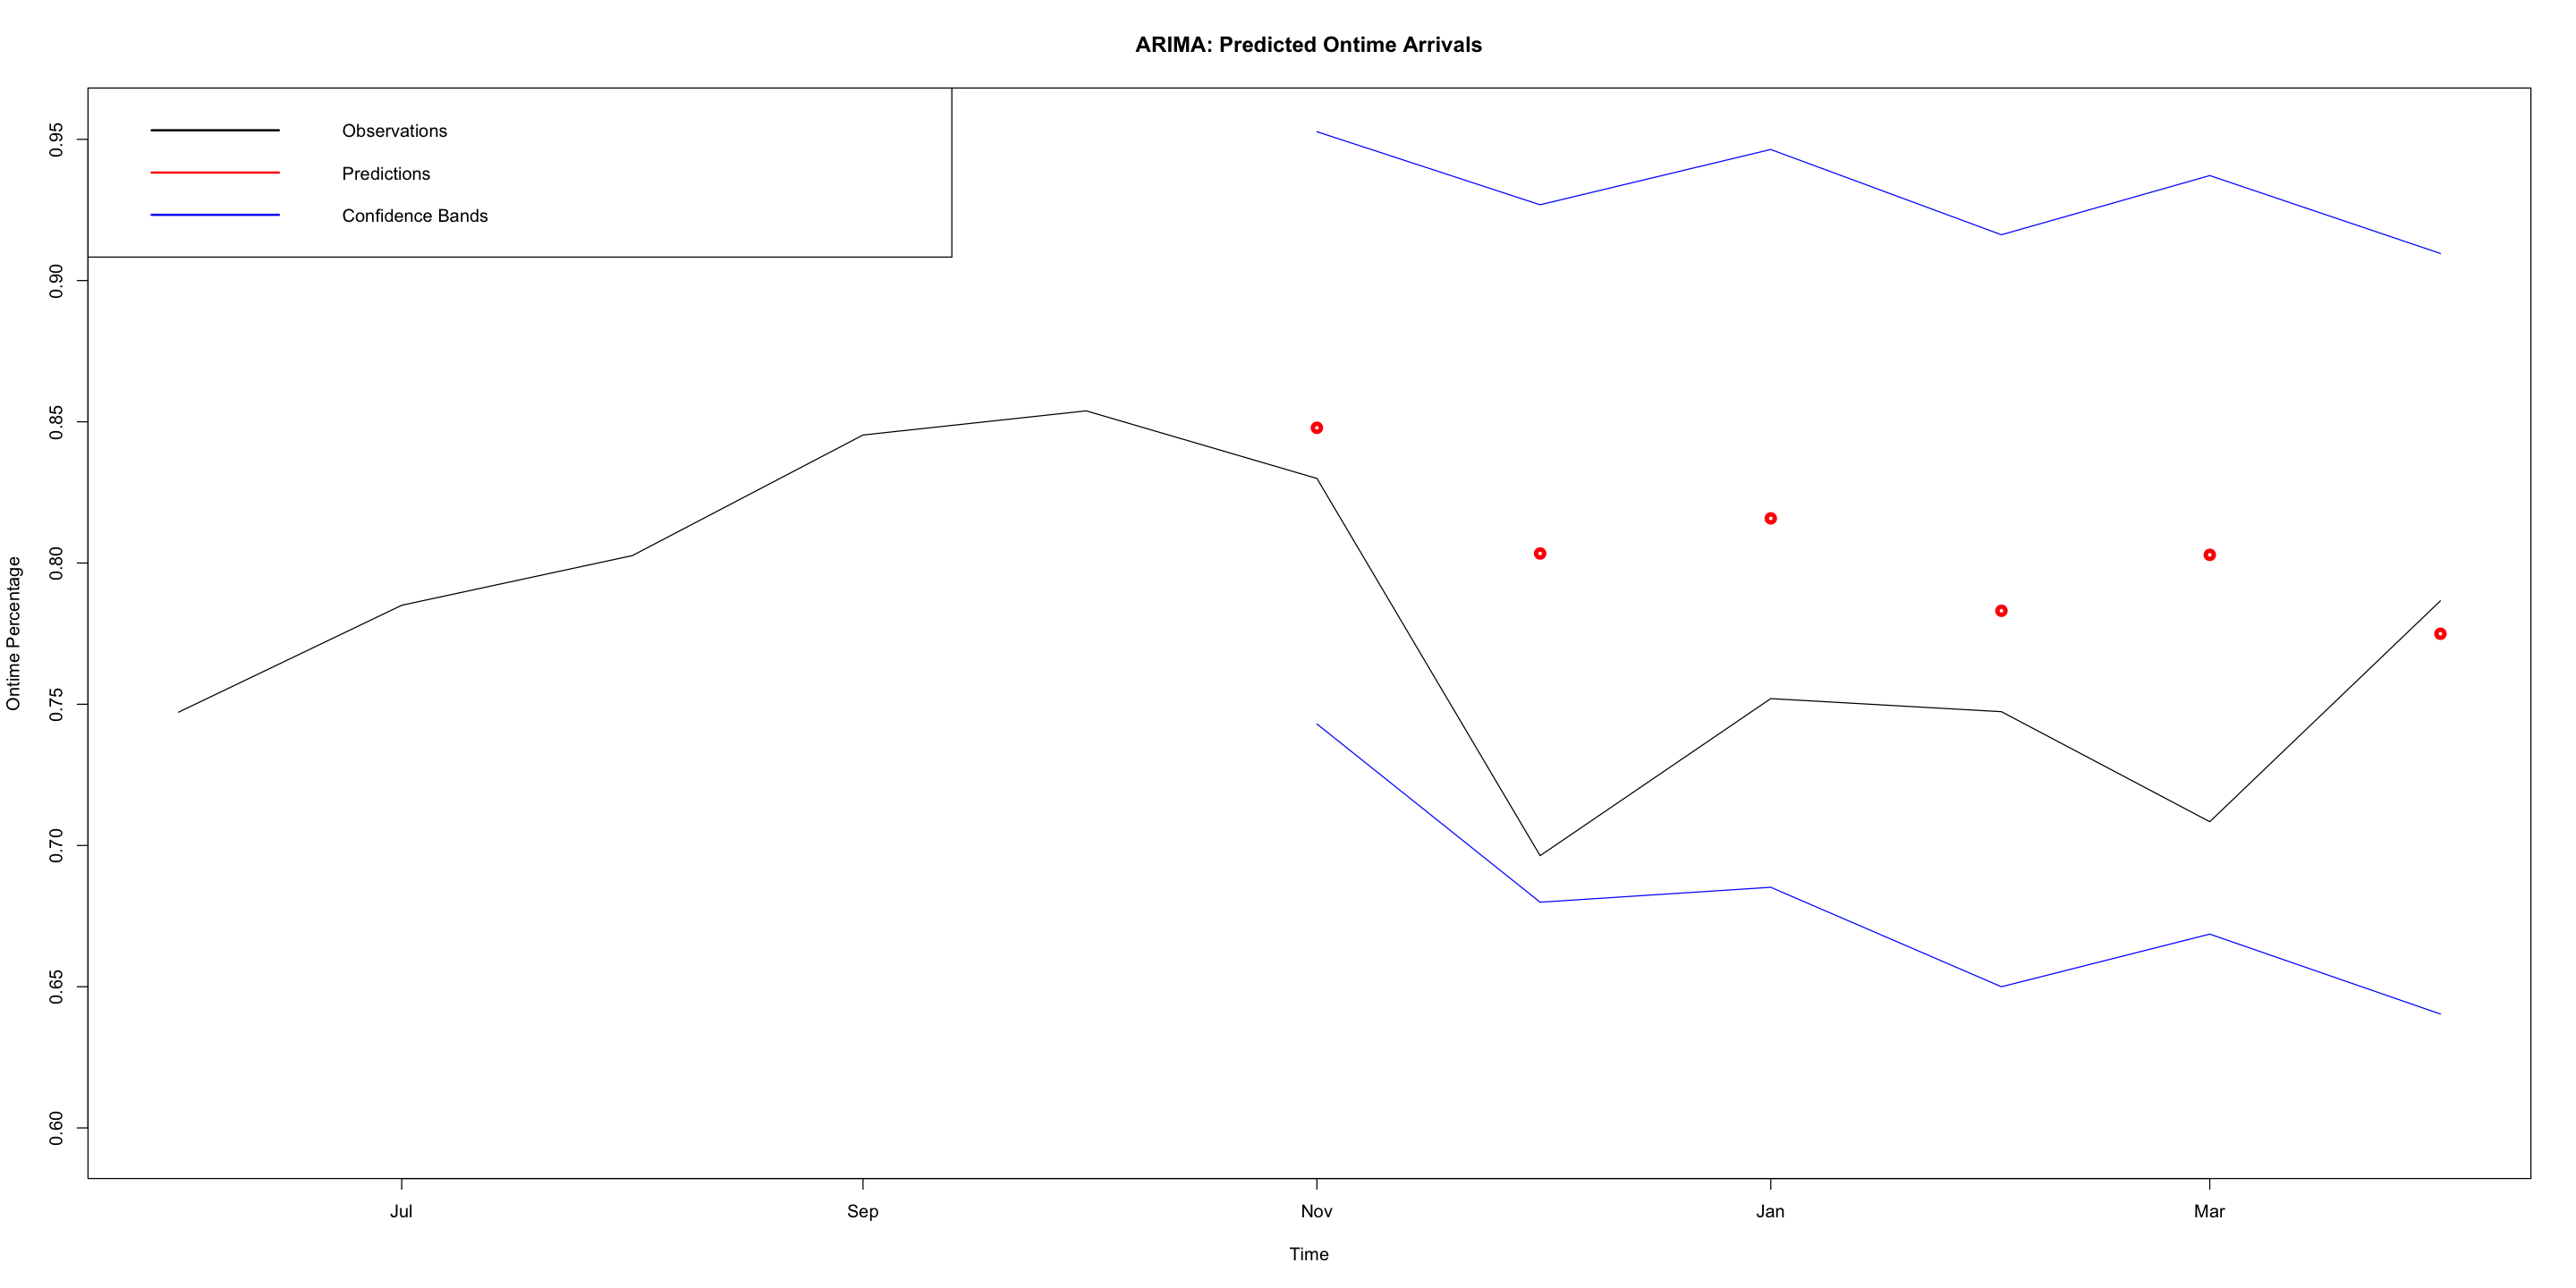

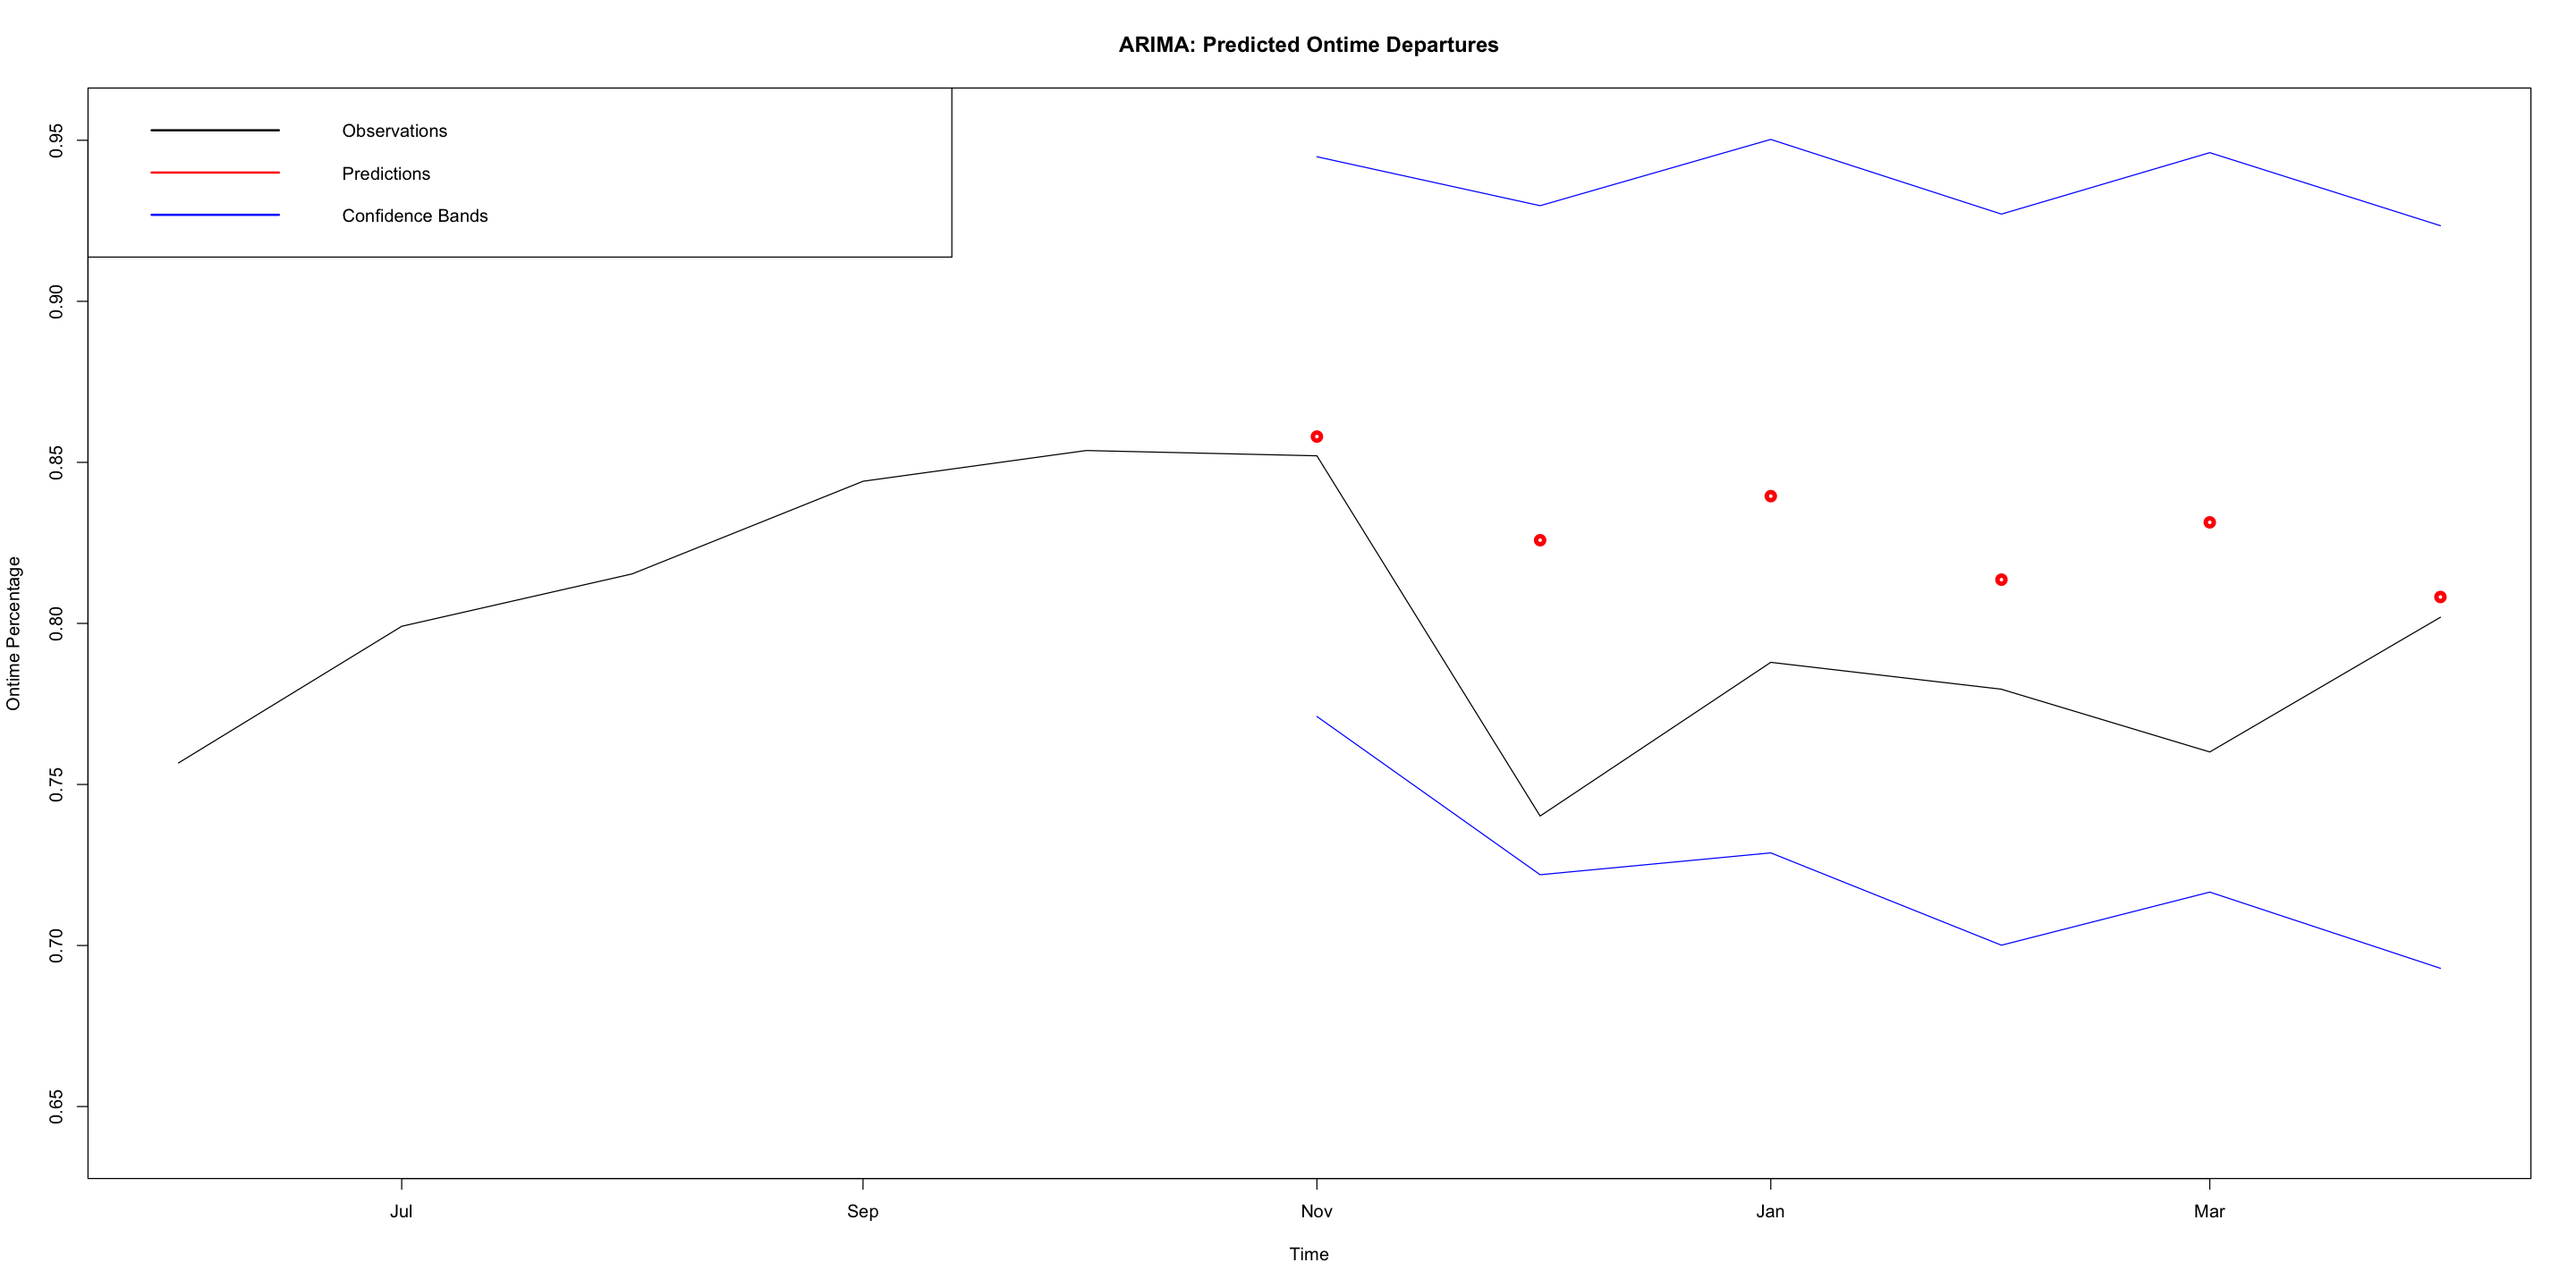

In [19]:
### Predictions & Forecasting

# arrivals_ontime
a_full = ts(data[, c(4)], freq=12, start=c(1990,01,01))
a_preds = predict(a_arima, n.ahead=6)

y_min_1 = min(data$arrivals_ontime[390:400]) - 0.1
y_max_1 = max(data$arrivals_ontime[390:400]) + 0.1
plot(as.Date(data$date[390:400]), a_full[390:400], type = "l", ylim = c(y_min_1, y_max_1), 
     xlab='Time', ylab = "Ontime Percentage", main='ARIMA: Predicted Ontime Arrivals')
points(as.Date(data$date[395:400]), a_preds$pred, col = "red", lwd=4)
lines(as.Date(data$date[395:400]), a_preds$pred + 1.96*a_preds$se, col = "blue")
lines(as.Date(data$date[395:400]), a_preds$pred - 1.96*a_preds$se, col = "blue")
legend('topleft', legend = c("Observations", "Predictions", "Confidence Bands"),
       lwd = 2, col = c("black", "red", "blue"))

# departures_ontime
d_full = ts(data[, c(10)], freq=12, start=c(1990,01,01))
d_preds = predict(d_arima, n.ahead=6)

y_min_2 = min(data$departures_ontime[390:400]) - 0.1
y_max_2 = max(data$departures_ontime[390:400]) + 0.1
plot(as.Date(data$date[390:400]), d_full[390:400], type = "l", ylim = c(y_min_2, y_max_2), 
     xlab='Time', ylab = "Ontime Percentage", main='ARIMA: Predicted Ontime Departures')
points(as.Date(data$date[395:400]), d_preds$pred, col = "red", lwd=4)
lines(as.Date(data$date[395:400]), d_preds$pred + 1.96*d_preds$se, col = "blue")
lines(as.Date(data$date[395:400]), d_preds$pred - 1.96*d_preds$se, col = "blue")
legend('topleft', legend = c("Observations", "Predictions", "Confidence Bands"),
       lwd = 2, col = c("black", "red", "blue"))

In [20]:
### Mean Absolute Precision Error (MAPE), Mean Squared Error (MSE), & Precision Measure (PM)

# arrivals_ontime
a_mape = mean(abs(as.vector(a_preds$pred)-as.vector(a_test))/as.vector(a_test))
a_mse = mean((as.vector(a_test)-as.vector(a_preds$pred))^2)
a_pm = sum((as.vector(a_preds$pred)-as.vector(a_test))^2)/sum((as.vector(a_test)-mean(as.vector(a_test)))^2)
cat('Arrivals ontime MAPE: ', a_mape, '\n')
cat('Arrivals ontime MSE: ', a_mse, '\n')
cat('Arrivals on time PM: ', a_pm, '\n')
cat('--------------------------------------', '\n')

# departures_ontime
d_mape = mean(abs(as.vector(d_preds$pred)-as.vector(d_test))/as.vector(d_test))
d_mse = mean((as.vector(d_test)-as.vector(d_preds$pred))^2)
d_pm = sum((as.vector(d_preds$pred)-as.vector(d_test))^2)/sum((as.vector(d_test)-mean(as.vector(d_test)))^2)
cat('Departures ontime MAPE: ', d_mape, '\n')
cat('Departures ontime MSE: ', d_mse, '\n')
cat('Departures ontime PM: ', d_pm, '\n')

Arrivals ontime MAPE:  0.07600972 
Arrivals ontime MSE:  0.00436281 
Arrivals on time PM:  2.132836 
-------------------------------------- 
Departures ontime MAPE:  0.05557131 
Departures ontime MSE:  0.002718165 
Departures ontime PM:  2.197046 


### Univariate ARIMA-GARCH

In [21]:
### Step 1: Apply ARMA(p,q) and select orders (p0,q0)

# arrivals_ontime - ARMA(2,1)

# departures_ontime - ARMA(2,1)

In [22]:
### Step 2: Apply ARMA(p0,q0)+GARCH(m,n) and select orders (m0,n0)

# arrivals_ontime
test_modelA2 <- function(m,n){
    spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                      mean.model=list(armaOrder=c(2,1), include.mean=T),
                      distribution.model="std")
    fit = ugarchfit(spec, a_train, solver = 'hybrid')
    current.bic = infocriteria(fit)[2]
    df = data.frame(m,n,current.bic)
    names(df) <- c("m","n","BIC")
    print(paste(m,n,current.bic,sep=" "))
    return(df)
}

ordersA2 = data.frame(Inf,Inf,Inf)
names(ordersA2) <- c("m","n","BIC")

for (m in 0:2){
    for (n in 0:2){
        possibleError <- tryCatch(
            ordersA2<-rbind(ordersA2, test_modelA2(m,n)),
            error=function(e) e
        )
        if(inherits(possibleError, "error")) next
    }
}
ordersA2 <- ordersA2[order(-ordersA2$BIC),]
tail(ordersA2, 10)

# GARCH(1,0)

[1] "0 0 -2.97118503255633"
[1] "0 1 -2.95603700443926"
[1] "0 2 -2.9408686011228"
[1] "1 0 -2.98071022687982"
[1] "1 1 -2.96513095840761"
[1] "1 2 -2.95077679131648"
[1] "2 0 -2.96554182355722"
[1] "2 1 -2.94996255508769"
[1] "2 2 -2.93560838800821"


,m,n,BIC
,<dbl>,<dbl>,<dbl>
1,Inf,Inf,Inf
10,2,2,-2.935608
4,0,2,-2.940869
9,2,1,-2.949963
7,1,2,-2.950777
3,0,1,-2.956037
6,1,1,-2.965131
8,2,0,-2.965542
2,0,0,-2.971185


In [23]:
# departures_ontime
test_modelD2 <- function(m,n){
    spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                      mean.model=list(armaOrder=c(2,1), include.mean=T),
                      distribution.model="std")
    fit = ugarchfit(spec, d_train, solver = 'hybrid')
    current.bic = infocriteria(fit)[2]
    df = data.frame(m,n,current.bic)
    names(df) <- c("m","n","BIC")
    print(paste(m,n,current.bic,sep=" "))
    return(df)
}

ordersD2 = data.frame(Inf,Inf,Inf)
names(ordersD2) <- c("m","n","BIC")

for (m in 0:2){
    for (n in 0:2){
        possibleError <- tryCatch(
            ordersD2<-rbind(ordersD2, test_modelD2(m,n)),
            error=function(e) e
        )
        if(inherits(possibleError, "error")) next
    }
}
ordersD2 <- ordersD2[order(-ordersD2$BIC),]
tail(ordersD2, 10)

# GARCH(0,1)

[1] "0 0 -3.40734938818447"
[1] "0 1 -3.39232153920202"
[1] "0 2 -3.37964099376533"
[1] "1 0 -3.42387991821279"
[1] "1 1 -3.40871151488916"
[1] "1 2 -3.36447259336582"
[1] "2 0 -3.40871151488957"
[1] "2 1 -3.39354311156719"
[1] "2 2 -3.37839449260046"


,m,n,BIC
,<dbl>,<dbl>,<dbl>
1,Inf,Inf,Inf
7,1,2,-3.364473
10,2,2,-3.378394
4,0,2,-3.379641
3,0,1,-3.392322
9,2,1,-3.393543
2,0,0,-3.407349
6,1,1,-3.408712
8,2,0,-3.408712


In [24]:
### Step 3: Apply ARMA(p,q)+GARCH(m0,n0) and select orders (p1,q1)

# arrivals_ontime
test_modelA3 <- function(p,q){
    spec = ugarchspec(variance.model=list(garchOrder=c(1,0)),
                      mean.model=list(armaOrder=c(p,q), include.mean=T),
                      distribution.model="std")
    fit = ugarchfit(spec, a_train, solver = 'hybrid')
    current.bic = infocriteria(fit)[2]
    df = data.frame(p,q,current.bic)
    names(df) <- c("p","q","BIC")
    print(paste(p,q,current.bic,sep=" "))
    return(df)
}

ordersA3 = data.frame(Inf,Inf,Inf)
names(ordersA3) <- c("p","q","BIC")
for (p in 0:8){
    for (q in 0:8){
        possibleError <- tryCatch(
            ordersA3<-rbind(ordersA3,test_modelA3(p,q)),
            error=function(e) e
        )
        if(inherits(possibleError, "error")) next
    }
}
ordersA3 <- ordersA3[order(-ordersA3$BIC),]
tail(ordersA3, 10)

# ARMA(3,1)

[1] "0 0 -2.60337491148879"
[1] "0 1 -2.71868892959295"
[1] "0 2 -2.86519864461485"
[1] "0 3 -2.8716272692129"
[1] "0 4 -2.8814652076178"
[1] "0 5 -2.86653748374652"
[1] "0 6 -2.87763796351217"
[1] "0 7 -2.88893063176641"
[1] "0 8 -2.88642679733003"
[1] "1 0 -2.91377733234236"
[1] "1 1 -2.94121013414977"
[1] "1 2 -2.92863185488706"
[1] "1 3 -2.94934185940423"
[1] "1 4 -2.93544272656804"
[1] "1 5 -2.92029716442959"
[1] "1 6 -2.91282117262751"
[1] "1 7 -2.89797816770221"
[1] "1 8 -2.92904160713974"
[1] "2 0 -2.93982356878841"
[1] "2 1 -2.98071022687982"
[1] "2 2 -2.98132262205041"
[1] "2 3 -3.00015481028866"
[1] "2 4 -2.98907544093085"
[1] "2 5 -2.98918178991474"
[1] "2 6 -2.85811961191649"
[1] "2 7 -2.87977463410711"
[1] "2 8 -2.82427518104466"
[1] "3 0 -2.92552543388329"
[1] "3 1 -2.99609761379973"
[1] "3 2 -2.83888112477044"
[1] "3 3 -2.88280822908089"
[1] "3 4 -2.97859325900721"
[1] "3 5 -2.9861593502894"
[1] "3 6 -2.76675736937011"
[1] "3 7 -2.94996338819944"
[1] "3 8 -2.83741449595

Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
“possible convergence problem: optim gave code = 1”


[1] "4 7 -3.05886146740296"
[1] "4 8 -2.9486889110724"
[1] "5 0 -2.93439561853069"
[1] "5 1 -2.92644132374765"
[1] "5 2 -2.93748702891348"
[1] "5 3 -3.01953138215211"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
“possible convergence problem: optim gave code = 1”


[1] "5 4 -3.02828233271013"
[1] "5 5 -2.97096850182531"
[1] "5 6 -2.84504907619127"
[1] "5 7 -2.59838063558456"
[1] "5 8 -2.89529201908462"
[1] "6 0 -2.9316317751078"
[1] "6 1 -2.97276143418434"
[1] "6 2 -2.95983898764974"
[1] "6 3 -2.94503694194562"
[1] "6 4 -2.99910853561012"
[1] "6 5 -2.65206642218158"
[1] "6 6 -2.96882405120788"
[1] "6 7 -2.97510497965632"
[1] "6 8 -2.92452728354243"
[1] "7 0 -2.92137238575143"
[1] "7 1 -2.97910707494635"
[1] "7 2 -2.94862936931514"
[1] "7 3 -2.86389310919953"
[1] "7 4 -2.98215967053327"
[1] "7 5 -2.71599434303738"
[1] "7 6 -2.99059361361634"
[1] "7 7 -2.93924817763464"
[1] "7 8 -2.81609455551331"
[1] "8 0 -2.90761403076106"
[1] "8 1 -2.96493733725048"
[1] "8 2 -2.93709234251506"
[1] "8 3 -2.99378854797108"
[1] "8 4 -2.50828749008449"
[1] "8 5 -2.97381490376094"
[1] "8 6 -2.94311209734993"
[1] "8 7 -2.95311455733284"
[1] "8 8 -2.93006472887344"


,p,q,BIC
,<dbl>,<dbl>,<dbl>
25,2,5,-2.989182
71,7,6,-2.990594
77,8,3,-2.993789
30,3,1,-2.996098
60,6,4,-2.999109
23,2,3,-3.000155
50,5,3,-3.019531
51,5,4,-3.028282
45,4,7,-3.058861


In [25]:
# departures_ontime - ARMA()
test_modelD3 <- function(p,q){
    spec = ugarchspec(variance.model=list(garchOrder=c(1,0)),
                      mean.model=list(armaOrder=c(p,q), include.mean=T),
                      distribution.model="std")
    fit = ugarchfit(spec, d_train, solver = 'hybrid')
    current.bic = infocriteria(fit)[2]
    df = data.frame(p,q,current.bic)
    names(df) <- c("p","q","BIC")
    print(paste(p,q,current.bic,sep=" "))
    return(df)
}

ordersD3 = data.frame(Inf,Inf,Inf)
names(ordersD3) <- c("p","q","BIC")
for (p in 0:8){
    for (q in 0:8){
        possibleError <- tryCatch(
            ordersD3<-rbind(ordersD3,test_modelD3(p,q)),
            error=function(e) e
        )
        if(inherits(possibleError, "error")) next
    }
}
ordersD3 <- ordersD3[order(-ordersD3$BIC),]
tail(ordersD3, 10)

# ARMA(3,2)

[1] "0 0 -2.89695862594672"
[1] "0 1 -3.07015201792412"
[1] "0 2 -3.23837511982823"
[1] "0 3 -3.23135736108351"
[1] "0 4 -3.27601334188416"
[1] "0 5 -3.26082206424936"
[1] "0 6 -3.27291703195781"
[1] "0 7 -3.28441705625343"
[1] "0 8 -3.29975456960928"
[1] "1 0 -3.3273141652973"
[1] "1 1 -3.34319192446382"
[1] "1 2 -3.32877805273733"
[1] "1 3 -3.34632776384975"
[1] "1 4 -3.32703125477033"
[1] "1 5 -3.31625394002041"
[1] "1 6 -3.31074123889551"
[1] "1 7 -3.2957278244601"
[1] "1 8 -3.34028141200037"
[1] "2 0 -3.34301561109955"
[1] "2 1 -3.42387991821279"
[1] "2 2 2.87352429908172"


Warning message in .makefitmodel(garchmodel = "sGARCH", f = .sgarchLLH, T = T, m = m, :
“
rugarch-->warning: failed to invert hessian
”


[1] "2 3 291.212114704263"
[1] "2 4 -3.02612190719636"
[1] "2 5 -3.41471799666999"
[1] "2 6 -3.40642737256857"
[1] "2 7 -3.34323705217687"
[1] "2 8 -3.35537550513516"
[1] "3 0 -3.32906532453792"
[1] "3 1 -3.40936272229423"
[1] "3 2 -3.43258587289431"
[1] "3 3 -3.28913442609586"
[1] "3 4 -3.41972553589719"
[1] "3 5 -3.3101891802342"
[1] "3 6 -3.40276121422126"
[1] "3 7 -3.3244383746861"
[1] "3 8 -3.43265163516477"
[1] "4 0 -3.33607947036058"
[1] "4 1 -3.33258416590139"
[1] "4 2 -3.42694758025971"
[1] "4 3 -3.34648544652126"
[1] "4 4 -3.37018334397835"
[1] "4 5 -3.52648354508075"
[1] "4 6 -3.51427573428564"
[1] "4 7 -3.23789563088634"
[1] "4 8 -3.39970219458214"
[1] "5 0 -3.32165815994237"
[1] "5 1 -3.34722663255262"
[1] "5 2 -3.42817218771709"
[1] "5 3 -3.34701984848544"
[1] "5 4 -3.37375983472474"
[1] "5 5 -3.42499972575597"
[1] "5 6 -3.45977119594528"
[1] "5 7 -3.44724760507662"
[1] "5 8 -3.25947225580496"
[1] "6 0 -3.32148150003235"
[1] "6 1 -3.4004035738155"
[1] "6 2 -3.317021045489

Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
“possible convergence problem: optim gave code = 1”


[1] "7 5 -3.32579289971354"
[1] "7 6 -3.13268440615529"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
“possible convergence problem: optim gave code = 1”


[1] "7 7 -3.18916024821406"


Warning message in arima(data, order = c(modelinc[2], 0, modelinc[3]), include.mean = modelinc[1], :
“possible convergence problem: optim gave code = 1”


[1] "7 8 -3.30795009891265"
[1] "8 0 -3.29651216967523"
[1] "8 1 -3.28873056337976"
[1] "8 2 -3.33812179226327"
[1] "8 3 -3.48040273919356"
[1] "8 4 -3.01069381590102"
[1] "8 5 -3.34223159825168"
[1] "8 6 -3.26800621936103"
[1] "8 7 -2.94575250643631"
[1] "8 8 -3.28183866917087"


,p,q,BIC
,<dbl>,<dbl>,<dbl>
49,5,2,-3.428172
31,3,2,-3.432586
37,3,8,-3.432652
54,5,7,-3.447248
53,5,6,-3.459771
63,6,7,-3.473013
77,8,3,-3.480403
68,7,3,-3.487069
44,4,6,-3.514276


In [26]:
### Step 4: Apply ARMA(p1,q1)+GARCH(m,n) and select (m1,n1)

# arrivals_ontime
test_modelA4 <- function(m,n){
    spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                      mean.model=list(armaOrder=c(3,1), include.mean=T), 
                      distribution.model="std")
    fit = ugarchfit(spec, a_train, solver = 'hybrid')
    current.bic = infocriteria(fit)[2]
    df = data.frame(m,n,current.bic)
    names(df) <- c("m","n","BIC")
    print(paste(m,n,current.bic,sep=" "))
    return(df)
}

ordersA4 = data.frame(Inf,Inf,Inf)
names(ordersA4) <- c("m","n","BIC")

for (m in 0:2){
    for (n in 0:2){
        possibleError <- tryCatch(
            ordersA4<-rbind(ordersA4,test_modelA4(m,n)),
            error=function(e) e
        )
        if(inherits(possibleError, "error")) next
    }
}
ordersA4 <- ordersA4[order(-ordersA4$BIC),]
tail(ordersA4, 10)

# GARCH(1,0)

[1] "0 0 -2.98286594359024"
[1] "0 1 -2.96771886320345"
[1] "0 2 -2.95255892905112"
[1] "1 0 -2.99609761379973"
[1] "1 1 -2.98086287552663"
[1] "1 2 -2.96591709562121"
[1] "2 0 -2.9809287838522"
[1] "2 1 -2.9657571944769"
[1] "2 2 -2.95074831907013"


,m,n,BIC
,<dbl>,<dbl>,<dbl>
1,Inf,Inf,Inf
10,2,2,-2.950748
4,0,2,-2.952559
9,2,1,-2.965757
7,1,2,-2.965917
3,0,1,-2.967719
6,1,1,-2.980863
8,2,0,-2.980929
2,0,0,-2.982866


In [27]:
# departures_ontime
test_modelD4 <- function(m,n){
    spec = ugarchspec(variance.model=list(garchOrder=c(m,n)),
                      mean.model=list(armaOrder=c(3,2), include.mean=T), 
                      distribution.model="std")
    fit = ugarchfit(spec, d_train, solver = 'hybrid')
    current.bic = infocriteria(fit)[2]
    df = data.frame(m,n,current.bic)
    names(df) <- c("m","n","BIC")
    print(paste(m,n,current.bic,sep=" "))
    return(df)
}

ordersD4 = data.frame(Inf,Inf,Inf)
names(ordersD4) <- c("m","n","BIC")

for (m in 0:2){
    for (n in 0:2){
        possibleError <- tryCatch(
            ordersD4<-rbind(ordersD4,test_modelD4(m,n)),
            error=function(e) e
        )
        if(inherits(possibleError, "error")) next
    }
}
ordersD4 <- ordersD4[order(-ordersD4$BIC),]
tail(ordersD4, 10)

# GARCH(0,1)

[1] "0 1 -3.4014287334472"
[1] "0 2 -3.38327221321109"
[1] "1 0 -3.43258587289431"
[1] "1 1 -3.41817757897658"
[1] "1 2 -3.38080001560632"
[1] "2 0 -3.22898385644485"
[1] "2 1 -3.40240200127761"
[1] "2 2 -3.36668074851476"


,m,n,BIC
,<dbl>,<dbl>,<dbl>
1,Inf,Inf,Inf
7,2,0,-3.228984
9,2,2,-3.366681
6,1,2,-3.380800
3,0,2,-3.383272
2,0,1,-3.401429
8,2,1,-3.402402
5,1,1,-3.418178
4,1,0,-3.432586


In [28]:
### Display the summary of the final model fit

# arrivals_ontime
spec_1 = ugarchspec(variance.model=list(garchOrder=c(1,0)),
                    mean.model=list(armaOrder=c(3,1), include.mean=T), 
                    distribution.model="std")
a_garch = ugarchfit(spec_1, a_train, solver = 'hybrid')
cat('Arrivals ontime model summary: ')
a_garch

Arrivals ontime model summary: 


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(3,0,1)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.790254    0.004952    159.5850 0.000000
ar1    -0.399067    0.008401    -47.5017 0.000000
ar2     0.706806    0.005734    123.2592 0.000000
ar3     0.104739    0.013492      7.7628 0.000000
ma1     1.000000    0.000003 341614.8891 0.000000
omega   0.002321    0.000269      8.6252 0.000000
alpha1  0.176313    0.074738      2.3591 0.018320
shape   7.149663    2.404650      2.9733 0.002946

Robust Standard Errors:
        Estimate  Std. Error     t value Pr(>|t|)
mu      0.790254    0.004663    169.4856 0.000000
ar1    -0.399067    0.004532    -88.0599 0.000000
ar2     0.706806    0.002174    325.1676 0.000000
ar3     0.104739 

In [29]:
# departures_ontime
spec_2 = ugarchspec(variance.model=list(garchOrder=c(1,0)),
                    mean.model=list(armaOrder=c(3,2), include.mean=T), 
                    distribution.model="std")
d_garch = ugarchfit(spec_2, d_train, solver = 'hybrid')
cat('Departures ontime model summary: ')
d_garch

Departures ontime model summary: 


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,0)
Mean Model	: ARFIMA(3,0,2)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error    t value Pr(>|t|)
mu      0.860620    0.000140  6167.7040 0.000000
ar1     0.462814    0.000077  6038.4689 0.000000
ar2     0.992809    0.000170  5832.0544 0.000000
ar3    -0.492116    0.000081 -6045.0439 0.000000
ma1     0.196713    0.000057  3462.3075 0.000000
ma2    -0.845216    0.000157 -5371.1575 0.000000
omega   0.001544    0.000223     6.9148 0.000000
alpha1  0.223814    0.108770     2.0577 0.039622
shape   4.495195    0.956155     4.7013 0.000003

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu      0.860620    0.000717 1200.6191 0.000000
ar1     0.462814    0.001501  308.2756 0.000000
ar2     0.992809    0.003308  300

**Order Selection:**

- arrivals_ontime: ARMA(3,1)-GARCH(1,0)
- departures_ontime: ARMA(3,2)-GARCH(1,0)

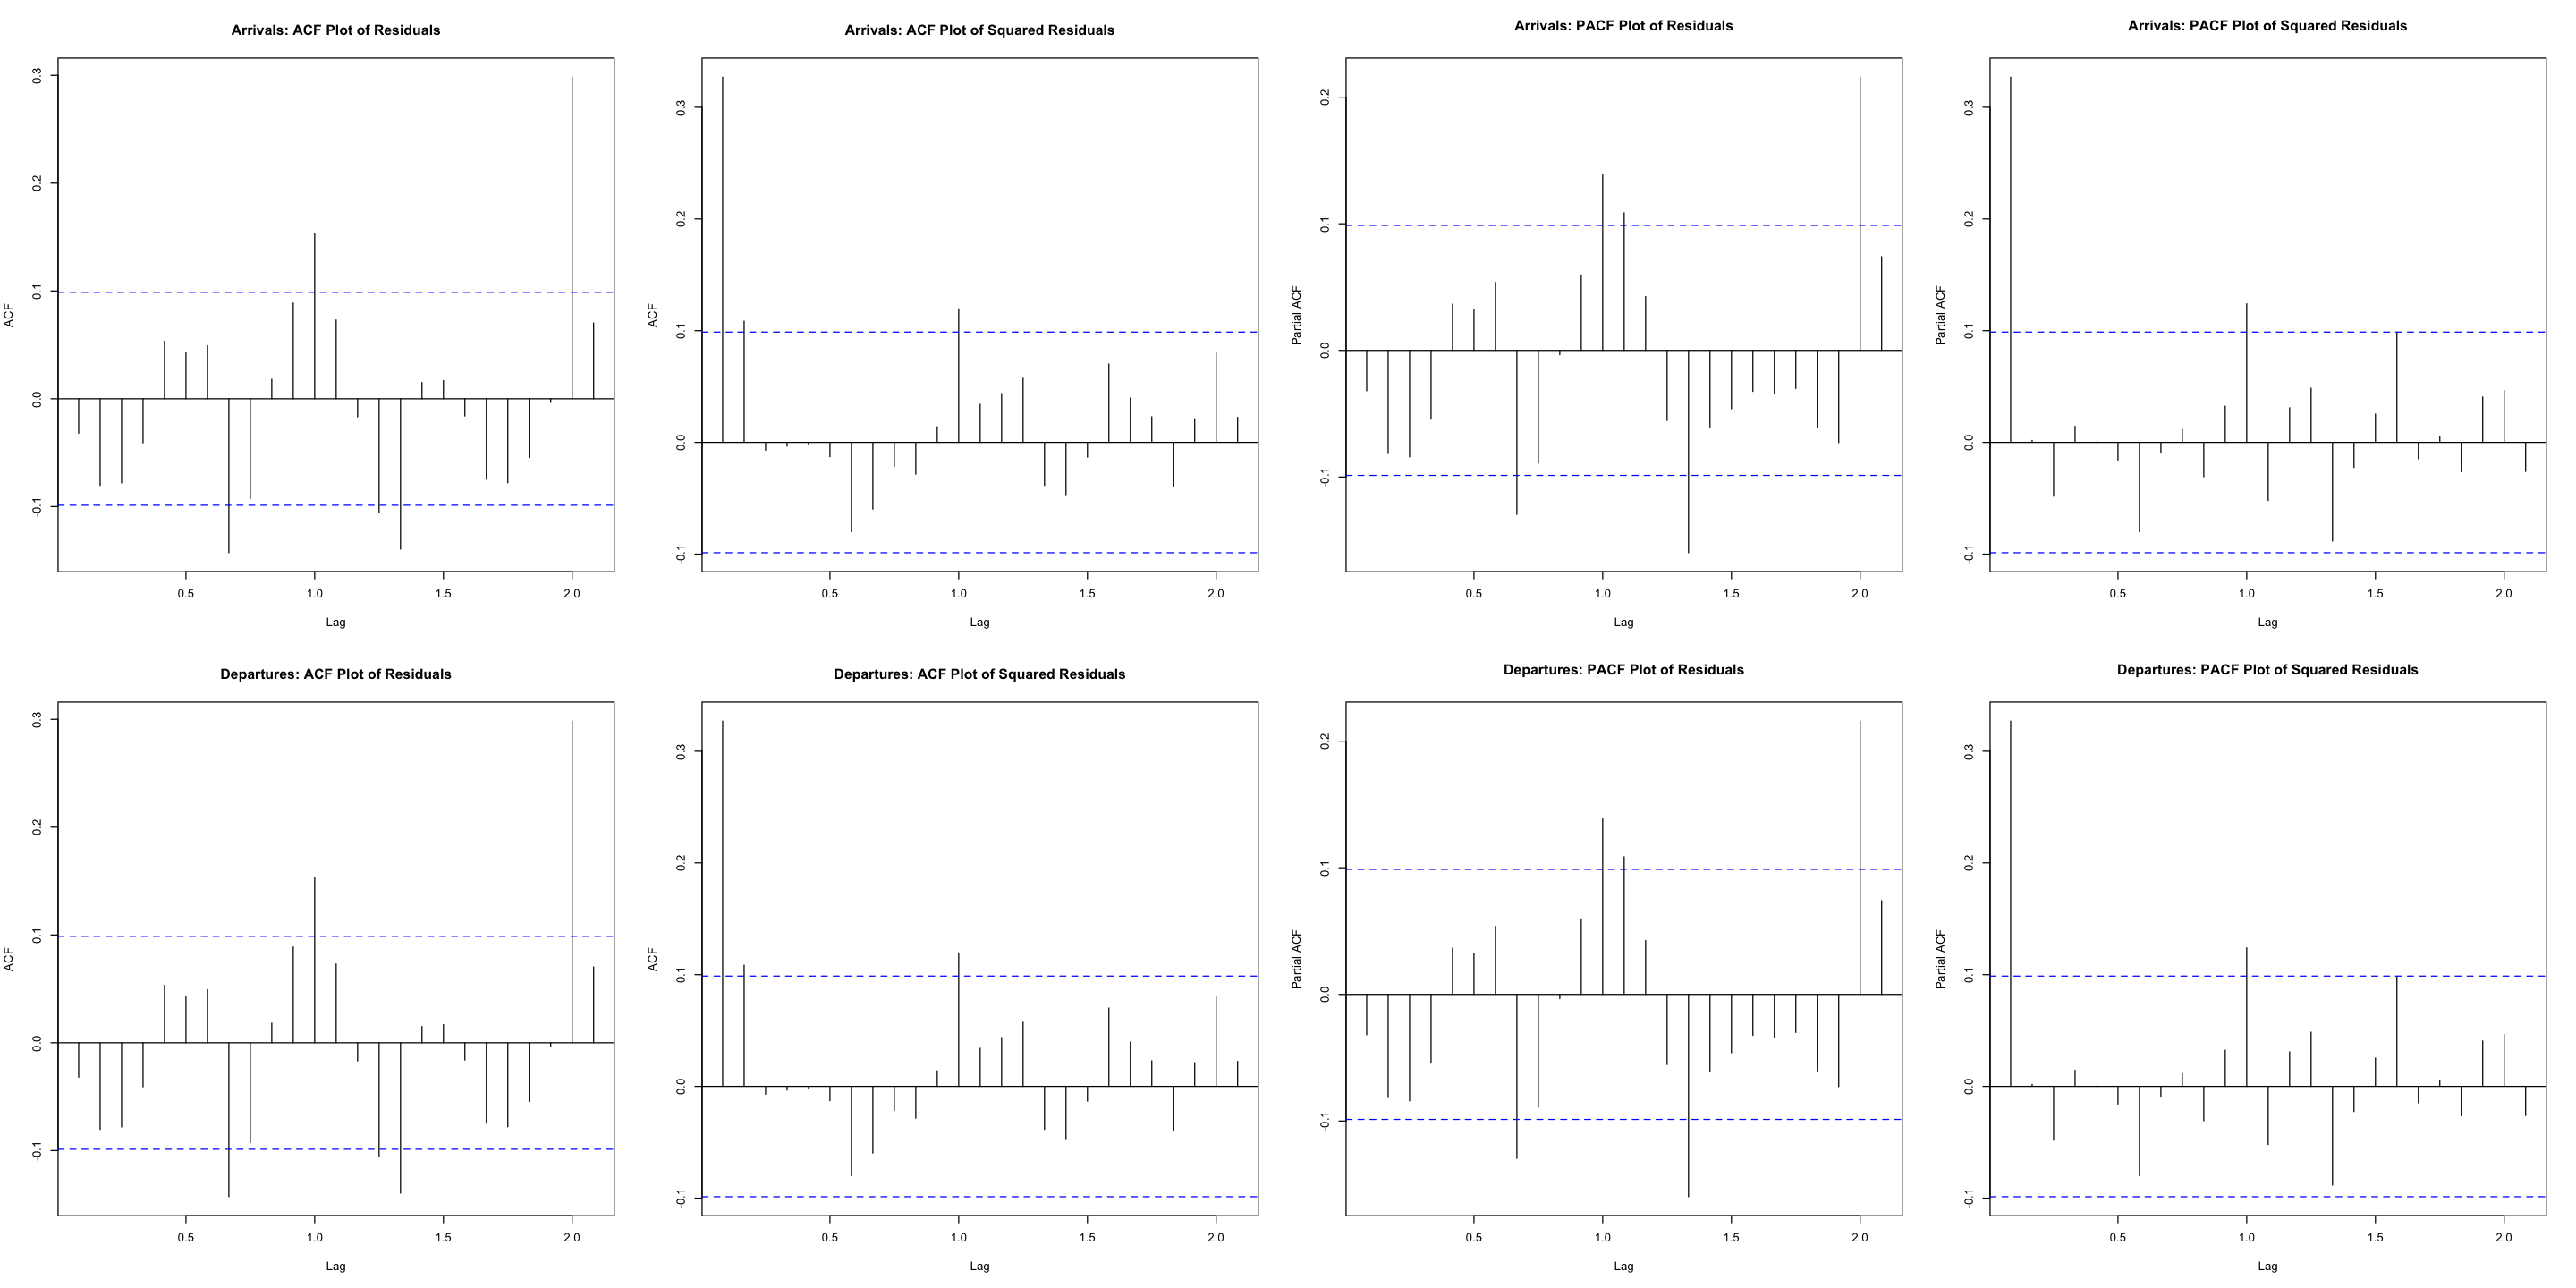

In [30]:
### Residual analysis
options(repr.plot.width = 24, repr.plot.height=12)
par(mfrow=c(2,4))

# arrivals_ontime
acf(residuals(d_garch), main='Arrivals: ACF Plot of Residuals')
acf(residuals(d_garch)^2, main='Arrivals: ACF Plot of Squared Residuals')
pacf(residuals(d_garch), main='Arrivals: PACF Plot of Residuals')
pacf(residuals(d_garch)^2, main='Arrivals: PACF Plot of Squared Residuals')

# departures_ontime
acf(residuals(d_garch), main='Departures: ACF Plot of Residuals')
acf(residuals(d_garch)^2, main='Departures: ACF Plot of Squared Residuals')
pacf(residuals(d_garch), main='Departures: PACF Plot of Residuals')
pacf(residuals(d_garch)^2, main='Departures: PACF Plot of Squared Residuals')

In [31]:
# arrivals_ontime
Box.test(residuals(a_garch), lag=10, type='Ljung')
Box.test(residuals(a_garch)^2, lag=10, type='Ljung')

# departures_ontime
Box.test(residuals(d_garch), lag=10, type='Ljung')
Box.test(residuals(d_garch)^2, lag=10, type='Ljung')


	Box-Ljung test

data:  residuals(a_garch)
X-squared = 20.197, df = 10, p-value = 0.02744



	Box-Ljung test

data:  residuals(a_garch)^2
X-squared = 31.004, df = 10, p-value = 0.0005858



	Box-Ljung test

data:  residuals(d_garch)
X-squared = 20.786, df = 10, p-value = 0.02263



	Box-Ljung test

data:  residuals(d_garch)^2
X-squared = 51.759, df = 10, p-value = 1.265e-07


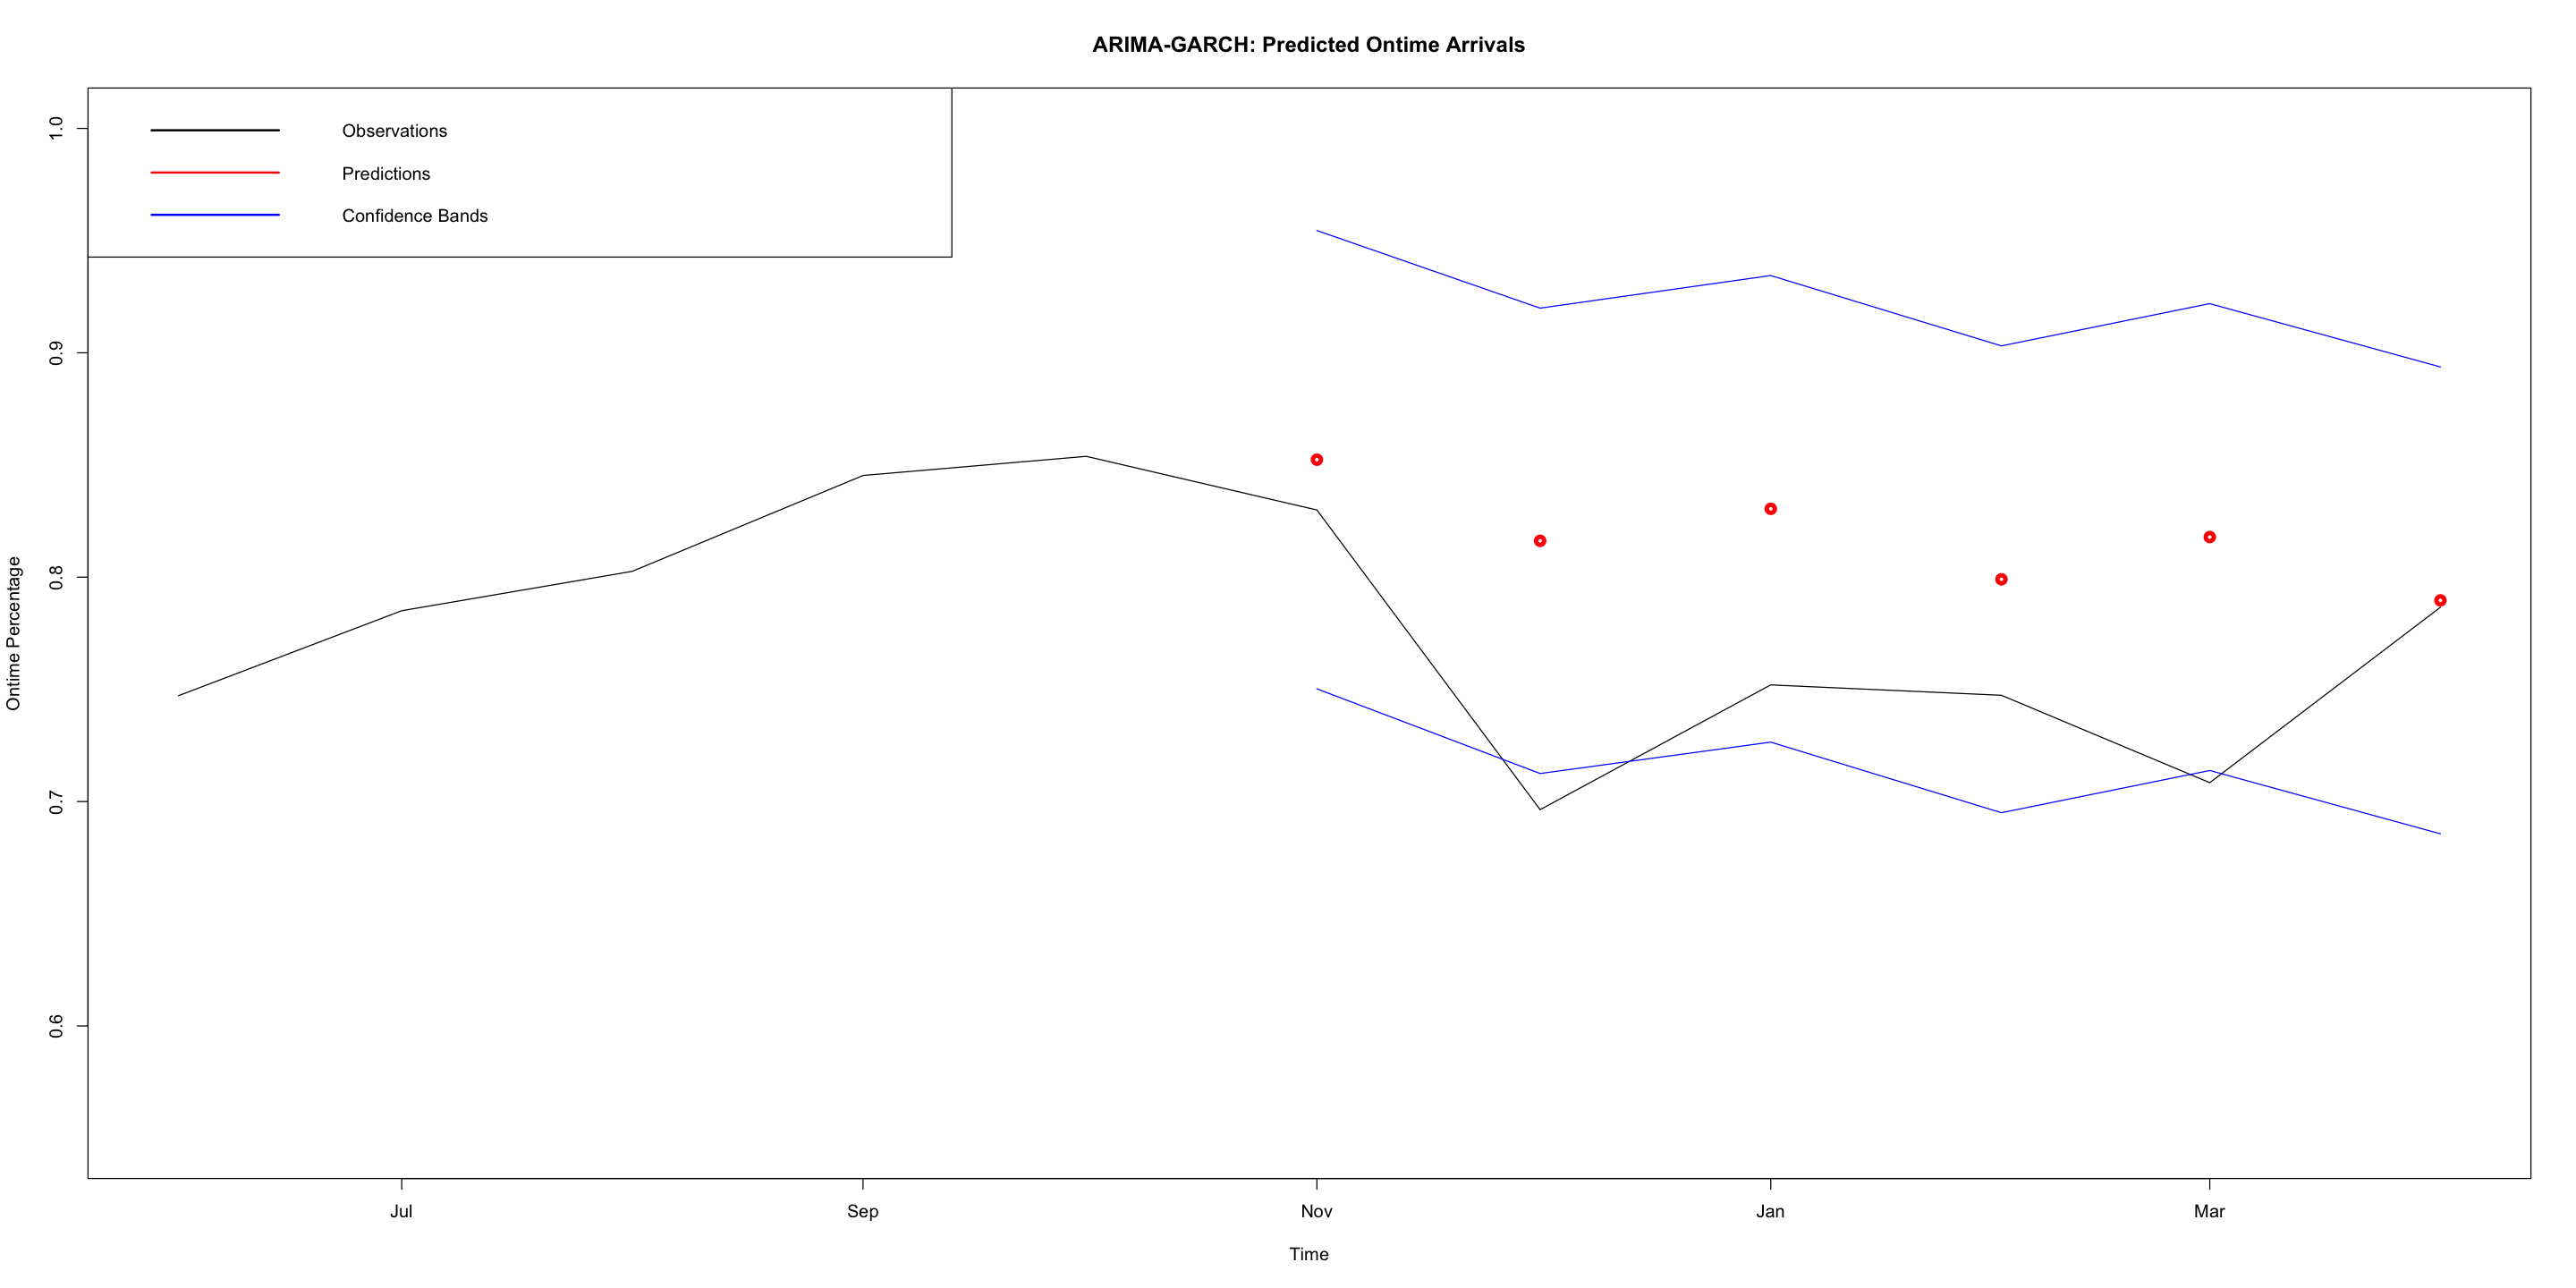

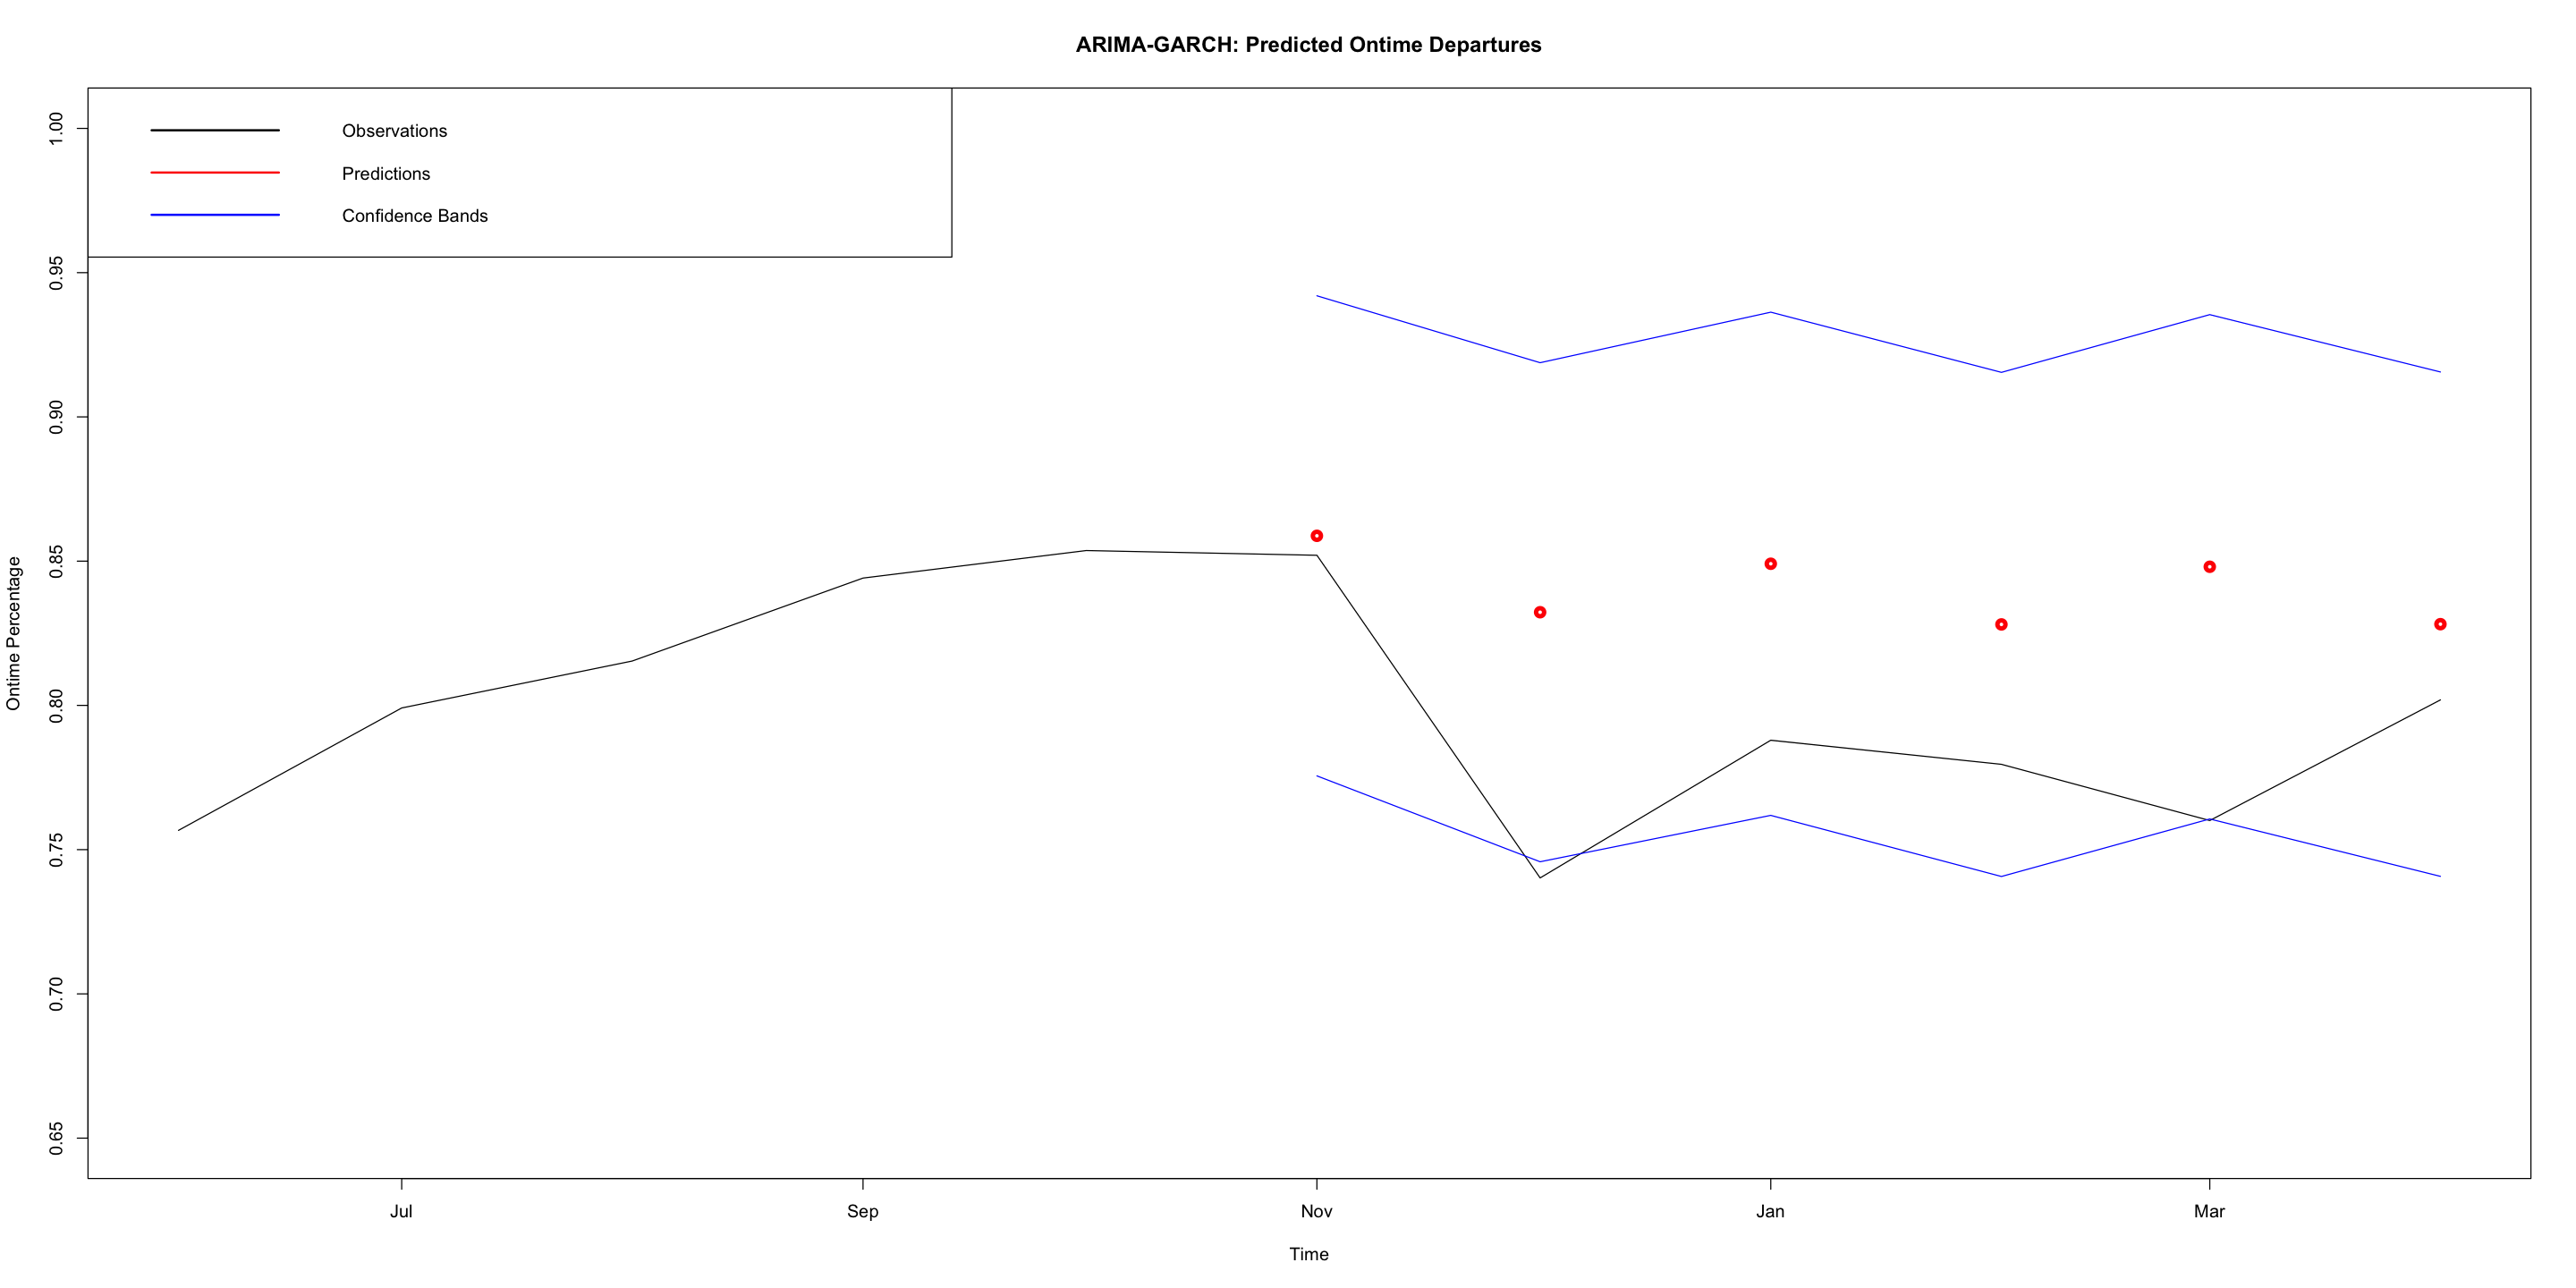

In [32]:
### Predictions & Forecast

# arrivals_ontime
agarch_preds = ugarchforecast(a_garch, n.ahead=6)
agarch_fore = as.vector(agarch_preds@forecast$seriesFor)
agarch_sigma = as.vector(agarch_preds@forecast$sigmaFor)

plot(as.Date(data$date[390:400]), a_full[390:400], type='l', ylim=c(0.55,1), 
     xlab='Time', ylab='Ontime Percentage', main='ARIMA-GARCH: Predicted Ontime Arrivals')
points(as.Date(data$date[395:400]), agarch_fore, col='red', lwd=4)
lines(as.Date(data$date[395:400]), agarch_fore + 1.96*agarch_sigma, col = "blue")
lines(as.Date(data$date[395:400]), agarch_fore - 1.96*agarch_sigma, col = "blue")
legend('topleft', legend=c('Observations', 'Predictions', 'Confidence Bands'), 
       lwd=2, col=c('black', 'red', 'blue'))

# departures_ontime
dgarch_preds = ugarchforecast(d_garch, n.ahead=6)
dgarch_fore = as.vector(dgarch_preds@forecast$seriesFor)
dgarch_sigma = as.vector(dgarch_preds@forecast$sigmaFor)

plot(as.Date(data$date[390:400]), d_full[390:400], type='l', ylim=c(0.65,1), 
     xlab='Time', ylab='Ontime Percentage', main='ARIMA-GARCH: Predicted Ontime Departures')
points(as.Date(data$date[395:400]), dgarch_fore, col='red', lwd=4)
lines(as.Date(data$date[395:400]), dgarch_fore + 1.96*dgarch_sigma, col = "blue")
lines(as.Date(data$date[395:400]), dgarch_fore - 1.96*dgarch_sigma, col = "blue")
legend('topleft', legend=c('Observations', 'Predictions', 'Confidence Bands'), 
       lwd=2, col=c('black', 'red', 'blue'))

In [33]:
### Mean Absolute Precision Error (MAPE), Mean Squared Error (MSE), & Precision Measure (PM)

# arrivals_ontime
a2_mape = mean(abs(agarch_fore-as.vector(a_test))/as.vector(a_test))
a2_mse = mean((as.vector(a_test)-agarch_fore)^2)
a2_pm = sum((agarch_fore-as.vector(a_test))^2)/sum((as.vector(a_test)-mean(as.vector(a_test)))^2)
cat('Arrivals ontime MAPE: ', a2_mape, '\n')
cat('Arrivals ontime MSE: ', a2_mse, '\n')
cat('Arrivals on time PM: ', a2_pm, '\n')
cat('--------------------------------------', '\n')

# departures_ontime
d2_mape = mean(abs(dgarch_fore-as.vector(d_test))/as.vector(d_test))
d2_mse = mean((as.vector(d_test)-dgarch_fore)^2)
d2_pm = sum((dgarch_fore-as.vector(d_test))^2)/sum((as.vector(d_test)-mean(as.vector(d_test)))^2)
cat('Departures ontime MAPE: ', d2_mape, '\n')
cat('Departures ontime MSE: ', d2_mse, '\n')
cat('Departures ontime PM: ', d2_pm, '\n')

Arrivals ontime MAPE:  0.08848919 
Arrivals ontime MSE:  0.005945786 
Arrivals on time PM:  2.906702 
-------------------------------------- 
Departures ontime MAPE:  0.07010394 
Departures ontime MSE:  0.003841093 
Departures ontime PM:  3.10469 


### Multivariate VAR

In [34]:
### Variable selection via stepwise regression

# arrivals_ontime
a_full <- lm(arrivals_ontime~arrivals_domestic+arrivals_international+arrivals_delayed+
           arrivals_cancelled+arrivals_passengers+departures_domestic+
           departures_international+departures_delayed+departures_cancelled+
           departures_passengers+temp+precipitation+during_covid)
a_min <- lm(arrivals_ontime~arrivals_domestic)
a_step <- step(a_full, scope=list(lower=a_min, upper=a_full), direction='backward')
summary(a_step)

Start:  AIC=-5614.69
arrivals_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_delayed + arrivals_cancelled + arrivals_passengers + 
    departures_domestic + departures_international + departures_delayed + 
    departures_cancelled + departures_passengers + temp + precipitation + 
    during_covid

                           Df Sum of Sq      RSS     AIC
- temp                      1  0.000000 0.000238 -5616.6
- precipitation             1  0.000000 0.000238 -5616.5
- arrivals_passengers       1  0.000000 0.000238 -5616.3
<none>                                  0.000238 -5614.7
- departures_passengers     1  0.000001 0.000239 -5614.6
- during_covid              1  0.000002 0.000239 -5613.8
- departures_cancelled      1  0.000003 0.000241 -5611.8
- departures_delayed        1  0.000007 0.000245 -5605.1
- departures_domestic       1  0.000008 0.000246 -5603.1
- arrivals_international    1  0.000011 0.000248 -5599.0
- departures_international  1  0.000013 0.000250 -559


Call:
lm(formula = arrivals_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_delayed + arrivals_cancelled + departures_domestic + 
    departures_international + departures_delayed + departures_cancelled + 
    departures_passengers + during_covid)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0043608 -0.0002628  0.0001236  0.0004822  0.0019030 

Coefficients:
                           Estimate Std. Error  t value Pr(>|t|)    
(Intercept)               9.998e-01  4.929e-04 2028.422  < 2e-16 ***
arrivals_domestic        -2.079e-05  4.296e-06   -4.839 1.89e-06 ***
arrivals_international    1.722e-05  4.133e-06    4.166 3.84e-05 ***
arrivals_delayed         -9.990e-01  1.948e-03 -512.854  < 2e-16 ***
arrivals_cancelled       -9.140e-01  3.722e-02  -24.560  < 2e-16 ***
departures_domestic       1.602e-05  4.412e-06    3.632 0.000320 ***
departures_international -1.848e-05  4.073e-06   -4.536 7.68e-06 ***
departures_delayed       -8.778e-03  2.3

**Important features:** intercept, arrivals_domestic, arrivals_international, arrivals_delayed, arrivals_cancelled, departures_domestic, departures_international, departures_delayed, departures_cancelled, departures_passengers, during_covid

In [35]:
# departures_ontime
d_full <- lm(departures_ontime~arrivals_domestic+arrivals_international+arrivals_delayed+
           arrivals_cancelled+arrivals_passengers+departures_domestic+
           departures_international+departures_delayed+departures_cancelled+
           departures_passengers+temp+precipitation+during_covid)
d_min <- lm(departures_ontime~arrivals_domestic)
d_step <- step(d_full, scope=list(lower=d_min, upper=d_full), direction='backward')
summary(d_step)

Start:  AIC=-16819.58
departures_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_delayed + arrivals_cancelled + arrivals_passengers + 
    departures_domestic + departures_international + departures_delayed + 
    departures_cancelled + departures_passengers + temp + precipitation + 
    during_covid



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq      RSS      AIC
- arrivals_cancelled        1  0.000000 0.000000 -16821.6
- departures_domestic       1  0.000000 0.000000 -16821.5
- precipitation             1  0.000000 0.000000 -16821.3
- during_covid              1  0.000000 0.000000 -16821.3
- temp                      1  0.000000 0.000000 -16821.1
- arrivals_delayed          1  0.000000 0.000000 -16821.0
- arrivals_passengers       1  0.000000 0.000000 -16820.8
- departures_passengers     1  0.000000 0.000000 -16820.6
- departures_international  1  0.000000 0.000000 -16820.1
- arrivals_international    1  0.000000 0.000000 -16819.7
<none>                                  0.000000 -16819.6
- departures_cancelled      1  0.000429 0.000429  -5384.0
- departures_delayed        1  0.091929 0.091929  -3269.1

Step:  AIC=-16821.56
departures_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_delayed + arrivals_passengers + departures_domestic + 
    departures_international + d

Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq      RSS      AIC
- departures_domestic       1  0.000000 0.000000 -16823.5
- during_covid              1  0.000000 0.000000 -16823.3
- precipitation             1  0.000000 0.000000 -16823.3
- temp                      1  0.000000 0.000000 -16823.0
- arrivals_delayed          1  0.000000 0.000000 -16823.0
- arrivals_passengers       1  0.000000 0.000000 -16822.8
- departures_passengers     1  0.000000 0.000000 -16822.6
- departures_international  1  0.000000 0.000000 -16822.1
- arrivals_international    1  0.000000 0.000000 -16821.7
<none>                                  0.000000 -16821.6
- departures_delayed        1  0.092026 0.092026  -3270.6
- departures_cancelled      1  0.197375 0.197375  -2970.0

Step:  AIC=-16823.51
departures_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_delayed + arrivals_passengers + departures_international + 
    departures_delayed + departures_cancelled + departures_passengers + 
    temp + p

Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq     RSS      AIC
- during_covid              1   0.00000 0.00000 -16825.3
- precipitation             1   0.00000 0.00000 -16825.2
- temp                      1   0.00000 0.00000 -16825.0
- arrivals_delayed          1   0.00000 0.00000 -16824.9
- arrivals_passengers       1   0.00000 0.00000 -16824.7
- departures_passengers     1   0.00000 0.00000 -16824.6
- departures_international  1   0.00000 0.00000 -16824.0
- arrivals_international    1   0.00000 0.00000 -16823.7
<none>                                  0.00000 -16823.5
- departures_delayed        1   0.09433 0.09433  -3262.9
- departures_cancelled      1   0.19747 0.19747  -2971.8

Step:  AIC=-16825.29
departures_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_delayed + arrivals_passengers + departures_international + 
    departures_delayed + departures_cancelled + departures_passengers + 
    temp + precipitation



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq     RSS      AIC
- precipitation             1   0.00000 0.00000 -16827.0
- temp                      1   0.00000 0.00000 -16826.9
- arrivals_delayed          1   0.00000 0.00000 -16826.9
- arrivals_passengers       1   0.00000 0.00000 -16826.4
- departures_passengers     1   0.00000 0.00000 -16826.3
- departures_international  1   0.00000 0.00000 -16825.8
- arrivals_international    1   0.00000 0.00000 -16825.4
<none>                                  0.00000 -16825.3
- departures_delayed        1   0.10783 0.10783  -3212.2
- departures_cancelled      1   0.19752 0.19752  -2973.7

Step:  AIC=-16827.04
departures_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_delayed + arrivals_passengers + departures_international + 
    departures_delayed + departures_cancelled + departures_passengers + 
    temp



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq     RSS      AIC
- arrivals_delayed          1   0.00000 0.00000 -16828.7
- temp                      1   0.00000 0.00000 -16828.4
- arrivals_passengers       1   0.00000 0.00000 -16828.2
- departures_passengers     1   0.00000 0.00000 -16828.2
- departures_international  1   0.00000 0.00000 -16827.5
- arrivals_international    1   0.00000 0.00000 -16827.1
<none>                                  0.00000 -16827.0
- departures_delayed        1   0.11082 0.11082  -3203.4
- departures_cancelled      1   0.19860 0.19860  -2973.6

Step:  AIC=-16828.65
departures_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_passengers + departures_international + departures_delayed + 
    departures_cancelled + departures_passengers + temp



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq     RSS      AIC
- temp                      1   0.00000 0.00000 -16830.1
- departures_passengers     1   0.00000 0.00000 -16829.8
- arrivals_passengers       1   0.00000 0.00000 -16829.8
- arrivals_international    1   0.00000 0.00000 -16828.8
- departures_international  1   0.00000 0.00000 -16828.7
<none>                                  0.00000 -16828.7
- departures_cancelled      1   0.20239 0.20239  -2968.1
- departures_delayed        1   0.62694 0.62694  -2522.6

Step:  AIC=-16830.12
departures_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_passengers + departures_international + departures_delayed + 
    departures_cancelled + departures_passengers



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq     RSS      AIC
- departures_passengers     1   0.00000 0.00000 -16831.3
- arrivals_passengers       1   0.00000 0.00000 -16831.1
- arrivals_international    1   0.00000 0.00000 -16830.3
- departures_international  1   0.00000 0.00000 -16830.2
<none>                                  0.00000 -16830.1
- departures_cancelled      1   0.20317 0.20317  -2968.6
- departures_delayed        1   0.78089 0.78089  -2438.1

Step:  AIC=-16831.26
departures_ontime ~ arrivals_domestic + arrivals_international + 
    arrivals_passengers + departures_international + departures_delayed + 
    departures_cancelled



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq     RSS      AIC
- arrivals_passengers       1   0.00000 0.00000 -16832.9
- arrivals_international    1   0.00000 0.00000 -16831.4
- departures_international  1   0.00000 0.00000 -16831.3
<none>                                  0.00000 -16831.3
- departures_cancelled      1   0.20327 0.20327  -2970.4
- departures_delayed        1   0.78672 0.78672  -2437.2

Step:  AIC=-16832.85
departures_ontime ~ arrivals_domestic + arrivals_international + 
    departures_international + departures_delayed + departures_cancelled



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq     RSS      AIC
- arrivals_international    1   0.00000 0.00000 -16833.1
- departures_international  1   0.00000 0.00000 -16833.0
<none>                                  0.00000 -16832.9
- departures_cancelled      1   0.21946 0.21946  -2942.2
- departures_delayed        1   0.94305 0.94305  -2367.8

Step:  AIC=-16833.05
departures_ontime ~ arrivals_domestic + departures_international + 
    departures_delayed + departures_cancelled



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                           Df Sum of Sq     RSS      AIC
- departures_international  1   0.00000 0.00000 -16835.0
<none>                                  0.00000 -16833.1
- departures_cancelled      1   0.21954 0.21954  -2944.1
- departures_delayed        1   0.94546 0.94546  -2368.8

Step:  AIC=-16834.98
departures_ontime ~ arrivals_domestic + departures_delayed + 
    departures_cancelled



Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


                       Df Sum of Sq     RSS      AIC
<none>                              0.00000 -16835.0
- departures_cancelled  1   0.21954 0.21954  -2946.1
- departures_delayed    1   1.05347 1.05347  -2328.2



Call:
lm(formula = departures_ontime ~ arrivals_domestic + departures_delayed + 
    departures_cancelled)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.055e-09 -2.957e-11  1.944e-11  5.496e-11  1.092e-09 

Coefficients:
                       Estimate Std. Error    t value Pr(>|t|)    
(Intercept)           1.000e+00  1.682e-10  5.944e+09   <2e-16 ***
arrivals_domestic    -7.075e-13  5.672e-13 -1.247e+00    0.213    
departures_delayed   -1.000e+00  5.107e-10 -1.958e+09   <2e-16 ***
departures_cancelled -1.000e+00  1.119e-09 -8.939e+08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.242e-10 on 390 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 1.708e+18 on 3 and 390 DF,  p-value: < 2.2e-16


**Important features:** intercept, arrivals_domestic, departures_delayed, departures_cancelled

In [36]:
### Train/test split based on important features

# arrivals_ontime
avar_train = cbind(arrivals_ontime, arrivals_delayed, arrivals_cancelled)
avar_test = a_test

# departures_ontime
dvar_train = cbind(departures_ontime, departures_delayed, departures_cancelled)
dvar_test = d_test

In [37]:
### VAR order selection

# arrivals_ontime
suppressWarnings({VARselect(diff(avar_train), lag.max=20)$selection})

# departures_ontime
suppressWarnings({VARselect(diff(dvar_train), lag.max=20)$selection})

AIC(n)  HQ(n)  SC(n) FPE(n) 
    13      4      3     13

AIC(n)  HQ(n)  SC(n) FPE(n) 
    20     20      1     10

In [38]:
### Unrestricted VAR model

# arrivals_ontime
avar_model = VAR(diff(avar_train), p=4)
summary(avar_model)

# departures_ontime
dvar_model = VAR(diff(round(dvar_train, 6)), p=20)
summary(dvar_model)


VAR Estimation Results:
Endogenous variables: arrivals_ontime, arrivals_delayed, arrivals_cancelled 
Deterministic variables: const 
Sample size: 389 
Log Likelihood: 3720.296 
Roots of the characteristic polynomial:
0.7481 0.7481 0.7055 0.7055 0.6985 0.6985 0.6228 0.6228 0.5897 0.5897 0.5847 0.5847
Call:
VAR(y = diff(avar_train), p = 4)


Estimation results for equation arrivals_ontime: 
arrivals_ontime = arrivals_ontime.l1 + arrivals_delayed.l1 + arrivals_cancelled.l1 + arrivals_ontime.l2 + arrivals_delayed.l2 + arrivals_cancelled.l2 + arrivals_ontime.l3 + arrivals_delayed.l3 + arrivals_cancelled.l3 + arrivals_ontime.l4 + arrivals_delayed.l4 + arrivals_cancelled.l4 + const 

                       Estimate Std. Error t value Pr(>|t|)   
arrivals_ontime.l1    8.899e+00  3.098e+00   2.873  0.00430 **
arrivals_delayed.l1   9.406e+00  3.114e+00   3.021  0.00269 **
arrivals_cancelled.l1 9.489e+00  3.118e+00   3.044  0.00250 **
arrivals_ontime.l2    7.615e+00  3.376e+00   2.255  0.02469 *


VAR Estimation Results:
Endogenous variables: departures_ontime, departures_delayed, departures_cancelled 
Deterministic variables: const 
Sample size: 373 
Log Likelihood: 6574.206 
Roots of the characteristic polynomial:
0.9714 0.9714 0.9662 0.9567 0.9567 0.9541 0.9541 0.9501 0.9501 0.9395 0.9395 0.9334 0.9334 0.932 0.9289 0.9289 0.9264 0.9264 0.9218 0.9218 0.9208 0.9208 0.9163 0.9163 0.9156 0.9156 0.9093 0.9093 0.9092 0.9092 0.9016 0.9016 0.899 0.899 0.8987 0.8987 0.8971 0.8971 0.8942 0.8942 0.8887 0.8887 0.8732 0.8732 0.8703 0.8703 0.8621 0.8621 0.8555 0.8555 0.8215 0.8215 0.8187 0.8187 0.7843 0.7843 0.7657 0.394 0.394 0.2522
Call:
VAR(y = diff(round(dvar_train, 6)), p = 20)


Estimation results for equation departures_ontime: 
departures_ontime = departures_ontime.l1 + departures_delayed.l1 + departures_cancelled.l1 + departures_ontime.l2 + departures_delayed.l2 + departures_cancelled.l2 + departures_ontime.l3 + departures_delayed.l3 + departures_cancelled.l3 + departures_ontime.

In [39]:
### Restricted VAR model

# arrivals_ontime
arvar_model = restrict(avar_model)
summary(arvar_model)

# departures_ontime
drvar_model = restrict(dvar_model)
summary(drvar_model)


VAR Estimation Results:
Endogenous variables: arrivals_ontime, arrivals_delayed, arrivals_cancelled 
Deterministic variables: const 
Sample size: 389 
Log Likelihood: 3217.475 
Roots of the characteristic polynomial:
1.438  1.22 0.8836 0.8836 0.7521 0.7521 0.6989 0.6989 0.6762 0.6762 0.5915 0.5915
Call:
VAR(y = diff(avar_train), p = 4)


Estimation results for equation arrivals_ontime: 
arrivals_ontime = arrivals_ontime.l1 + arrivals_delayed.l1 + arrivals_cancelled.l1 + arrivals_ontime.l2 + arrivals_delayed.l2 + arrivals_cancelled.l2 + arrivals_ontime.l3 + arrivals_delayed.l3 + arrivals_cancelled.l3 + arrivals_ontime.l4 + arrivals_delayed.l4 + arrivals_cancelled.l4 

                      Estimate Std. Error t value Pr(>|t|)   
arrivals_ontime.l1       8.900      3.094   2.877  0.00425 **
arrivals_delayed.l1      9.407      3.110   3.025  0.00266 **
arrivals_cancelled.l1    9.490      3.113   3.048  0.00247 **
arrivals_ontime.l2       7.616      3.372   2.259  0.02447 * 
arrivals_dela


VAR Estimation Results:
Endogenous variables: departures_ontime, departures_delayed, departures_cancelled 
Deterministic variables: const 
Sample size: 373 
Log Likelihood: 2762.524 
Roots of the characteristic polynomial:
1.673 1.665 1.665 1.664 1.664 1.655 1.655 1.653 1.653  1.65  1.65  1.65  1.65 1.636 1.636 1.634 1.634 0.9833 0.9833 0.9742 0.9742 0.9731 0.9731 0.9653 0.9526 0.9526 0.9451 0.9451 0.9369 0.9369 0.9269 0.9269 0.9206 0.9206 0.9203 0.9203 0.9167 0.9167 0.9108 0.907 0.907 0.8711 0.8711 0.8704 0.8704 0.8373 0.8373 0.7777 0.7777 0.7559 0.7559 0.7237 0.7237     0     0     0     0     0     0     0
Call:
VAR(y = diff(round(dvar_train, 6)), p = 20)


Estimation results for equation departures_ontime: 
departures_ontime = departures_ontime.l1 + departures_delayed.l1 + departures_ontime.l2 + departures_delayed.l2 + departures_ontime.l3 + departures_delayed.l3 + departures_cancelled.l4 + departures_cancelled.l5 + departures_ontime.l6 + departures_delayed.l6 + departures_ontime.

In [40]:
### Wald test

# arrivals_ontime - only
coef_a = coefficients(avar_model)$arrivals_ontime[-(4*3+1),1]
var_a = vcov(avar_model)[c(2:(4*3+1)), c(2:(4*3+1))]
wald.test(b=coef_a, var_a, Terms=seq(1, (4*3), 3))
wald.test(b=coef_a, var_a, Terms=seq(2, (4*3), 3))
wald.test(b=coef_a, var_a, Terms=seq(3, (4*3), 3))

Wald test:
----------

Chi-squared test:
X2 = 13.4, df = 4, P(> X2) = 0.0093

Wald test:
----------

Chi-squared test:
X2 = 14.4, df = 4, P(> X2) = 0.006

Wald test:
----------

Chi-squared test:
X2 = 14.7, df = 4, P(> X2) = 0.0054

In [41]:
### Goodness of fit for restricted model using the multivariate ARCH test,
### Jarque-Bera test, and Portmanteau test

# arrivals_ontime
arch.test(arvar_model)
normality.test(arvar_model)
serial.test(arvar_model)
cat('---------------------------------------------', '\n')

# departures_ontime
arch.test(drvar_model)
normality.test(drvar_model)
serial.test(drvar_model)


	ARCH (multivariate)

data:  Residuals of VAR object arvar_model
Chi-squared = 786.57, df = 180, p-value < 2.2e-16

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object arvar_model
Chi-squared = 786.57, df = 180, p-value < 2.2e-16



$JB

	JB-Test (multivariate)

data:  Residuals of VAR object arvar_model
Chi-squared = 58647, df = 6, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object arvar_model
Chi-squared = 1449.7, df = 3, p-value < 2.2e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object arvar_model
Chi-squared = 57197, df = 3, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object arvar_model
Chi-squared = 58647, df = 6, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object arvar_model
Chi-squared = 1449.7, df = 3, p-value < 2.2e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object arvar_model
Chi-squared = 57197, df = 3, p-value < 2.2e-16





	Portmanteau Test (asymptotic)

data:  Residuals of VAR object arvar_model
Chi-squared = 477.43, df = 108, p-value < 2.2e-16

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object arvar_model
Chi-squared = 477.43, df = 108, p-value < 2.2e-16



--------------------------------------------- 



	ARCH (multivariate)

data:  Residuals of VAR object drvar_model
Chi-squared = 720.12, df = 180, p-value < 2.2e-16

$arch.mul

	ARCH (multivariate)

data:  Residuals of VAR object drvar_model
Chi-squared = 720.12, df = 180, p-value < 2.2e-16



$JB

	JB-Test (multivariate)

data:  Residuals of VAR object drvar_model
Chi-squared = 17704, df = 6, p-value < 2.2e-16


$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object drvar_model
Chi-squared = 725.57, df = 3, p-value < 2.2e-16


$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object drvar_model
Chi-squared = 16979, df = 3, p-value < 2.2e-16


$jb.mul
$jb.mul$JB

	JB-Test (multivariate)

data:  Residuals of VAR object drvar_model
Chi-squared = 17704, df = 6, p-value < 2.2e-16


$jb.mul$Skewness

	Skewness only (multivariate)

data:  Residuals of VAR object drvar_model
Chi-squared = 725.57, df = 3, p-value < 2.2e-16


$jb.mul$Kurtosis

	Kurtosis only (multivariate)

data:  Residuals of VAR object drvar_model
Chi-squared = 16979, df = 3, p-value < 2.2e-16




Warning message in pchisq(STATISTIC, df = PARAMETER):
“NaNs produced”
Warning message in pchisq(STATISTIC, df = PARAMETER):
“NaNs produced”



	Portmanteau Test (asymptotic)

data:  Residuals of VAR object drvar_model
Chi-squared = 343.77, df = -36, p-value = NA

$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object drvar_model
Chi-squared = 343.77, df = -36, p-value = NA



In [42]:
### Predictions & Forecasts - Unrestricted VAR
n = nrow(data)

# arrivals_ontime
preds_a1 = predict(avar_model, n.ahead=6)
fcst_a1 = preds_a1[[1]]$arrivals_ontime[,1]
a_finalPred_1 = rep(0,6)
a_finalPred_1[1] = as.vector(a_train)[(n-6)]+fcst_a1[1]
a_finalPred_1[2] = a_finalPred_1[1] + fcst_a1[2]
a_finalPred_1[3] = a_finalPred_1[2] + fcst_a1[3]
a_finalPred_1[4] = a_finalPred_1[3] + fcst_a1[4]
a_finalPred_1[5] = a_finalPred_1[4] + fcst_a1[5]
a_finalPred_1[6] = a_finalPred_1[5] + fcst_a1[6]

# departures_ontime
preds_d1 = predict(dvar_model, n.ahead=6)
fcst_d1 = preds_d1[[1]]$departures_ontime[,1]
d_finalPred_1 = rep(0,6)
d_finalPred_1[1] = as.vector(d_train)[(n-6)]+fcst_d1[1]
d_finalPred_1[2] = d_finalPred_1[1] + fcst_d1[2]
d_finalPred_1[3] = d_finalPred_1[2] + fcst_d1[3]
d_finalPred_1[4] = d_finalPred_1[3] + fcst_d1[4]
d_finalPred_1[5] = d_finalPred_1[4] + fcst_d1[5]
d_finalPred_1[6] = d_finalPred_1[5] + fcst_d1[6]

In [43]:
### MAPE, MSE, and PM - Unrestricted VAR

# arrivals_ontime
avar_mape_1 = mean(abs(a_finalPred_1-as.vector(a_test))/as.vector(a_test))
avar_mse_1 = mean((as.vector(a_test)-a_finalPred_1)^2)
avar_pm_1 = sum((a_finalPred_1-as.vector(a_test))^2)/sum((as.vector(a_test)-mean(as.vector(a_test)))^2)

cat('Arrivals ontime MAPE: ', avar_mape_1, '\n')
cat('Arrivals ontime MSE: ', avar_mse_1, '\n')
cat('Arrivals on time PM: ', avar_pm_1, '\n')
cat('--------------------------------------', '\n')

# departures_ontime
dvar_mape_1 = mean(abs(d_finalPred_1-as.vector(d_test))/as.vector(d_test))
dvar_mse_1 = mean((as.vector(d_test)-d_finalPred_1)^2)
dvar_pm_1 = sum((d_finalPred_1-as.vector(d_test))^2)/sum((as.vector(d_test)-mean(as.vector(d_test)))^2)

cat('Departures ontime MAPE: ', dvar_mape_1, '\n')
cat('Departures ontime MSE: ', dvar_mse_1, '\n')
cat('Departures ontime PM: ', dvar_pm_1, '\n')

Arrivals ontime MAPE:  0.1010805 
Arrivals ontime MSE:  0.00721621 
Arrivals on time PM:  3.527771 
-------------------------------------- 
Departures ontime MAPE:  0.06373908 
Departures ontime MSE:  0.003478339 
Departures ontime PM:  2.811481 


In [44]:
### Predictions & Forecasts - Restricted VAR

# arrivals_ontime
preds_a = predict(arvar_model, n.ahead=6)
fcst_a = preds_a[[1]]$arrivals_ontime[,1]
a_finalPred = rep(0,6)
a_finalPred[1] = as.vector(a_train)[(n-6)]+fcst_a[1]
a_finalPred[2] = a_finalPred[1] + fcst_a[2]
a_finalPred[3] = a_finalPred[2] + fcst_a[3]
a_finalPred[4] = a_finalPred[3] + fcst_a[4]
a_finalPred[5] = a_finalPred[4] + fcst_a[5]
a_finalPred[6] = a_finalPred[5] + fcst_a[6]

# departures_ontime
preds_d = predict(drvar_model, n.ahead=6)
fcst_d = preds_d[[1]]$departures_ontime[,1]
d_finalPred = rep(0,6)
d_finalPred[1] = as.vector(d_train)[(n-6)]+fcst_d[1]
d_finalPred[2] = d_finalPred[1] + fcst_d[2]
d_finalPred[3] = d_finalPred[2] + fcst_d[3]
d_finalPred[4] = d_finalPred[3] + fcst_d[4]
d_finalPred[5] = d_finalPred[4] + fcst_d[5]
d_finalPred[6] = d_finalPred[5] + fcst_d[6]

In [45]:
### MAPE, MSE, and PM

# arrivals_ontime
avar_mape = mean(abs(a_finalPred-as.vector(a_test))/as.vector(a_test))
avar_mse = mean((as.vector(a_test)-a_finalPred)^2)
avar_pm = sum((a_finalPred-as.vector(a_test))^2)/sum((as.vector(a_test)-mean(as.vector(a_test)))^2)

cat('Arrivals ontime MAPE: ', avar_mape, '\n')
cat('Arrivals ontime MSE: ', avar_mse, '\n')
cat('Arrivals on time PM: ', avar_pm, '\n')
cat('--------------------------------------', '\n')

# departures_ontime
dvar_mape = mean(abs(d_finalPred-as.vector(d_test))/as.vector(d_test))
dvar_mse = mean((as.vector(d_test)-d_finalPred)^2)
dvar_pm = sum((d_finalPred-as.vector(d_test))^2)/sum((as.vector(d_test)-mean(as.vector(d_test)))^2)

cat('Departures ontime MAPE: ', dvar_mape, '\n')
cat('Departures ontime MSE: ', dvar_mse, '\n')
cat('Departures ontime PM: ', dvar_pm, '\n')

Arrivals ontime MAPE:  0.1871917 
Arrivals ontime MSE:  0.02402257 
Arrivals on time PM:  11.74386 
-------------------------------------- 
Departures ontime MAPE:  0.06232115 
Departures ontime MSE:  0.003340975 
Departures ontime PM:  2.700452 


**Interpretation:**

Unrestricted VAR model is better for arrivals_ontime.

Restricted VAR model is better for departures_ontime.

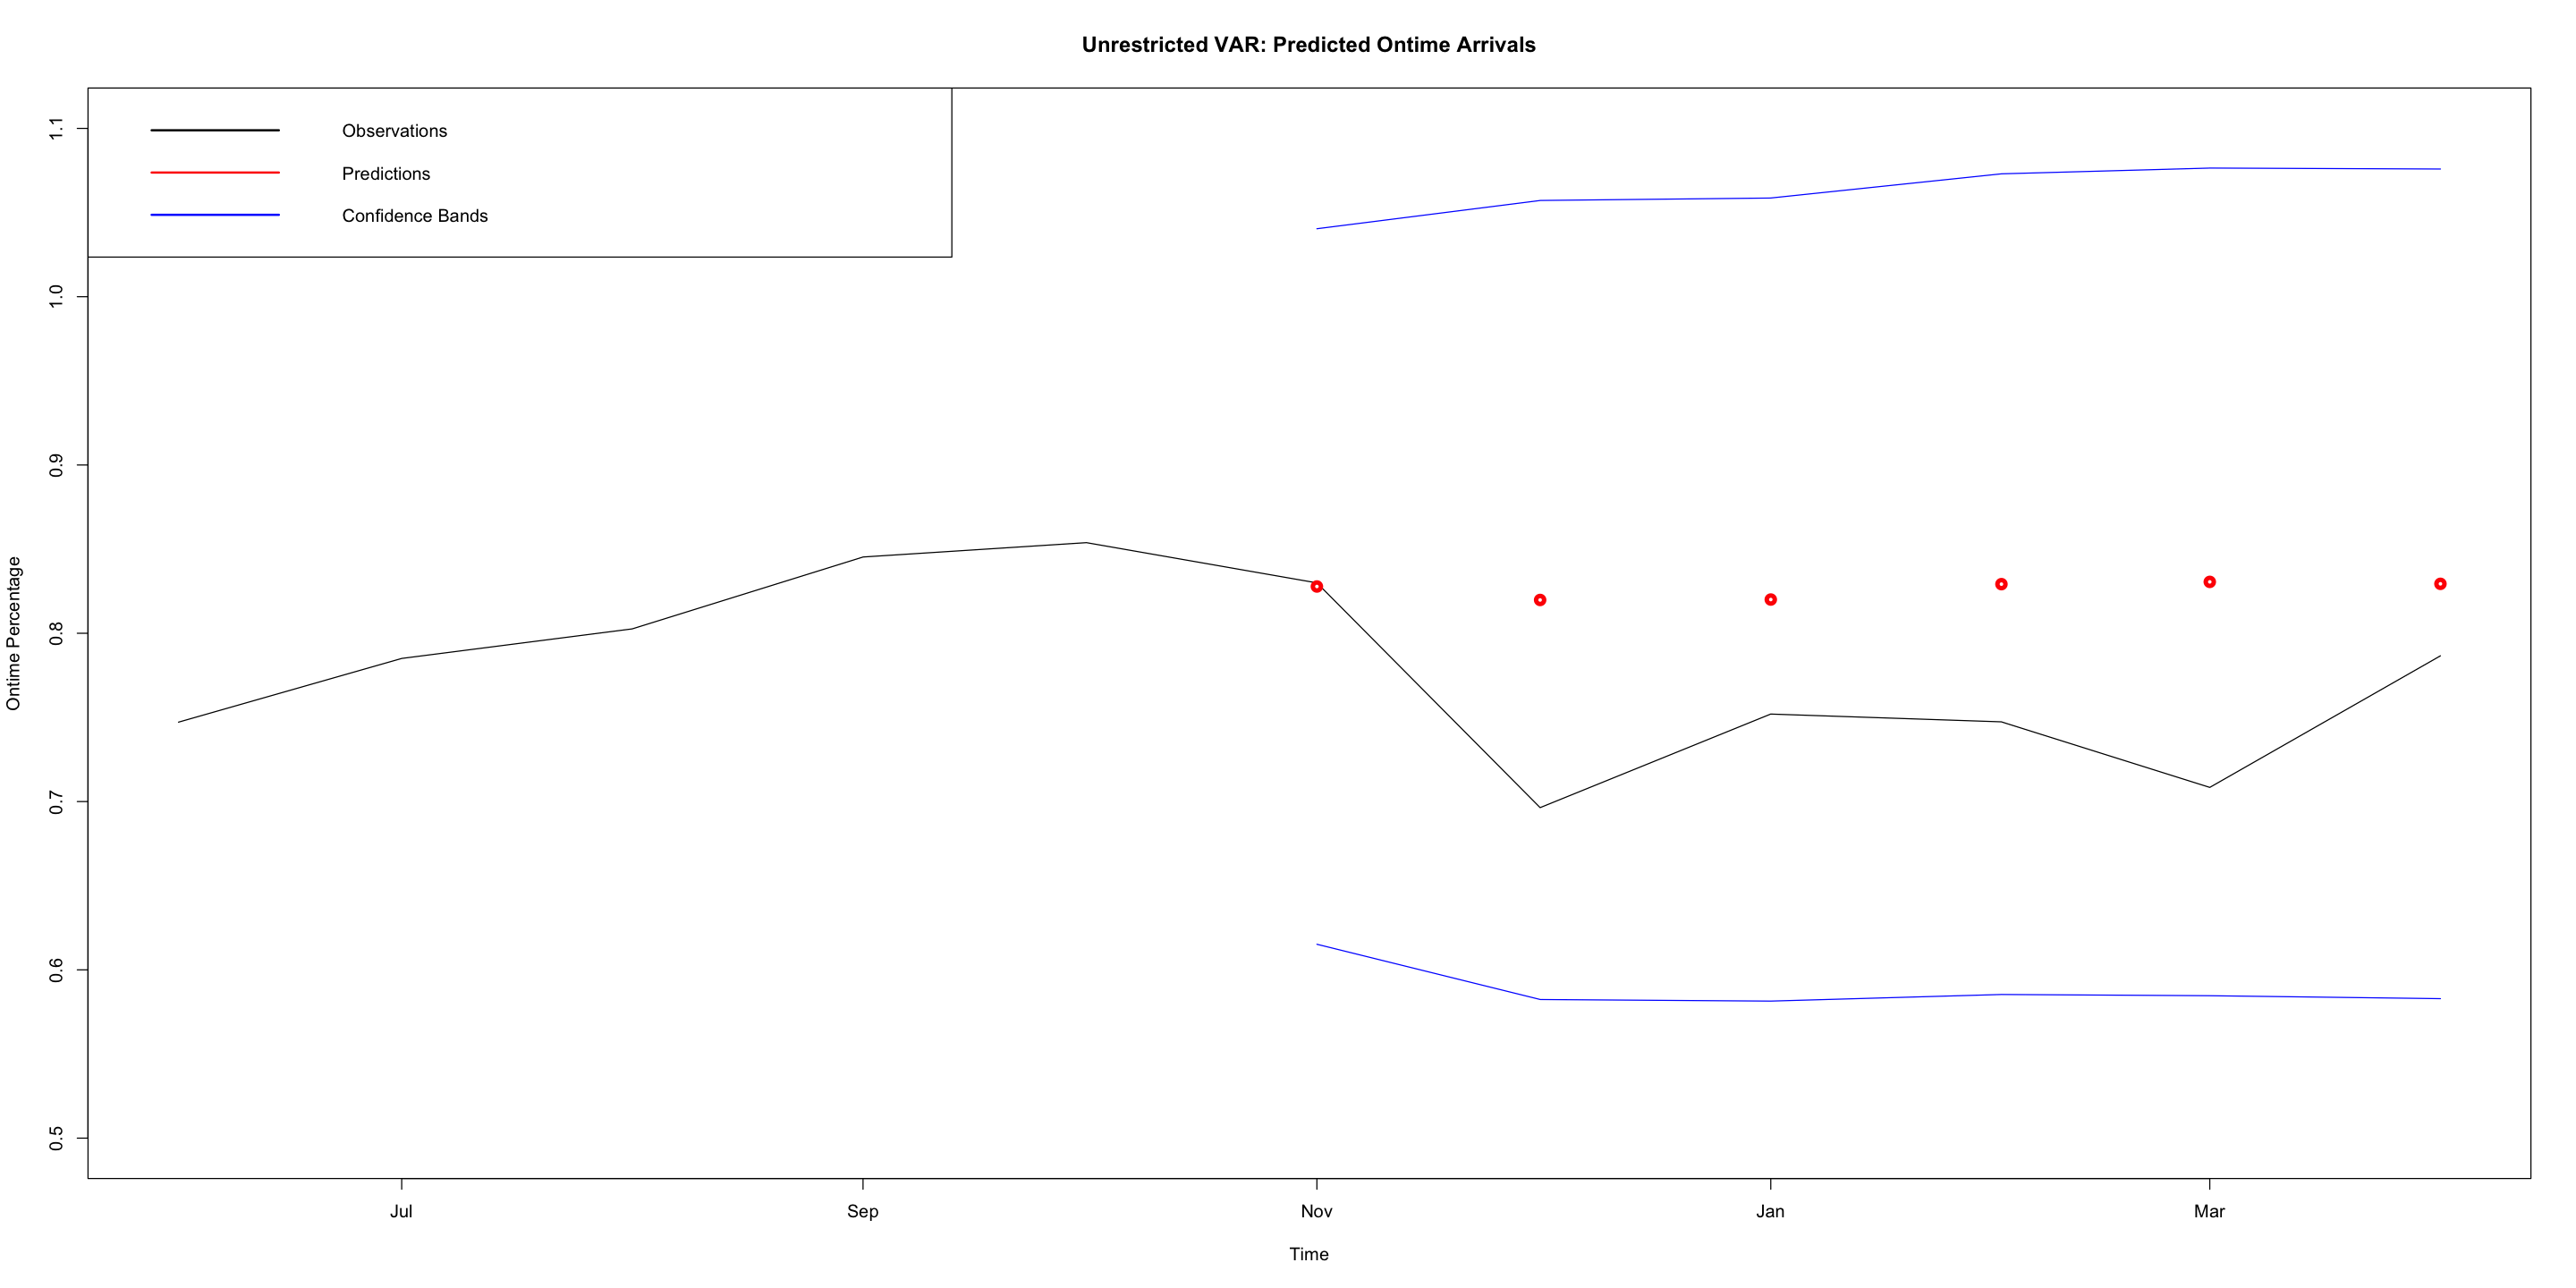

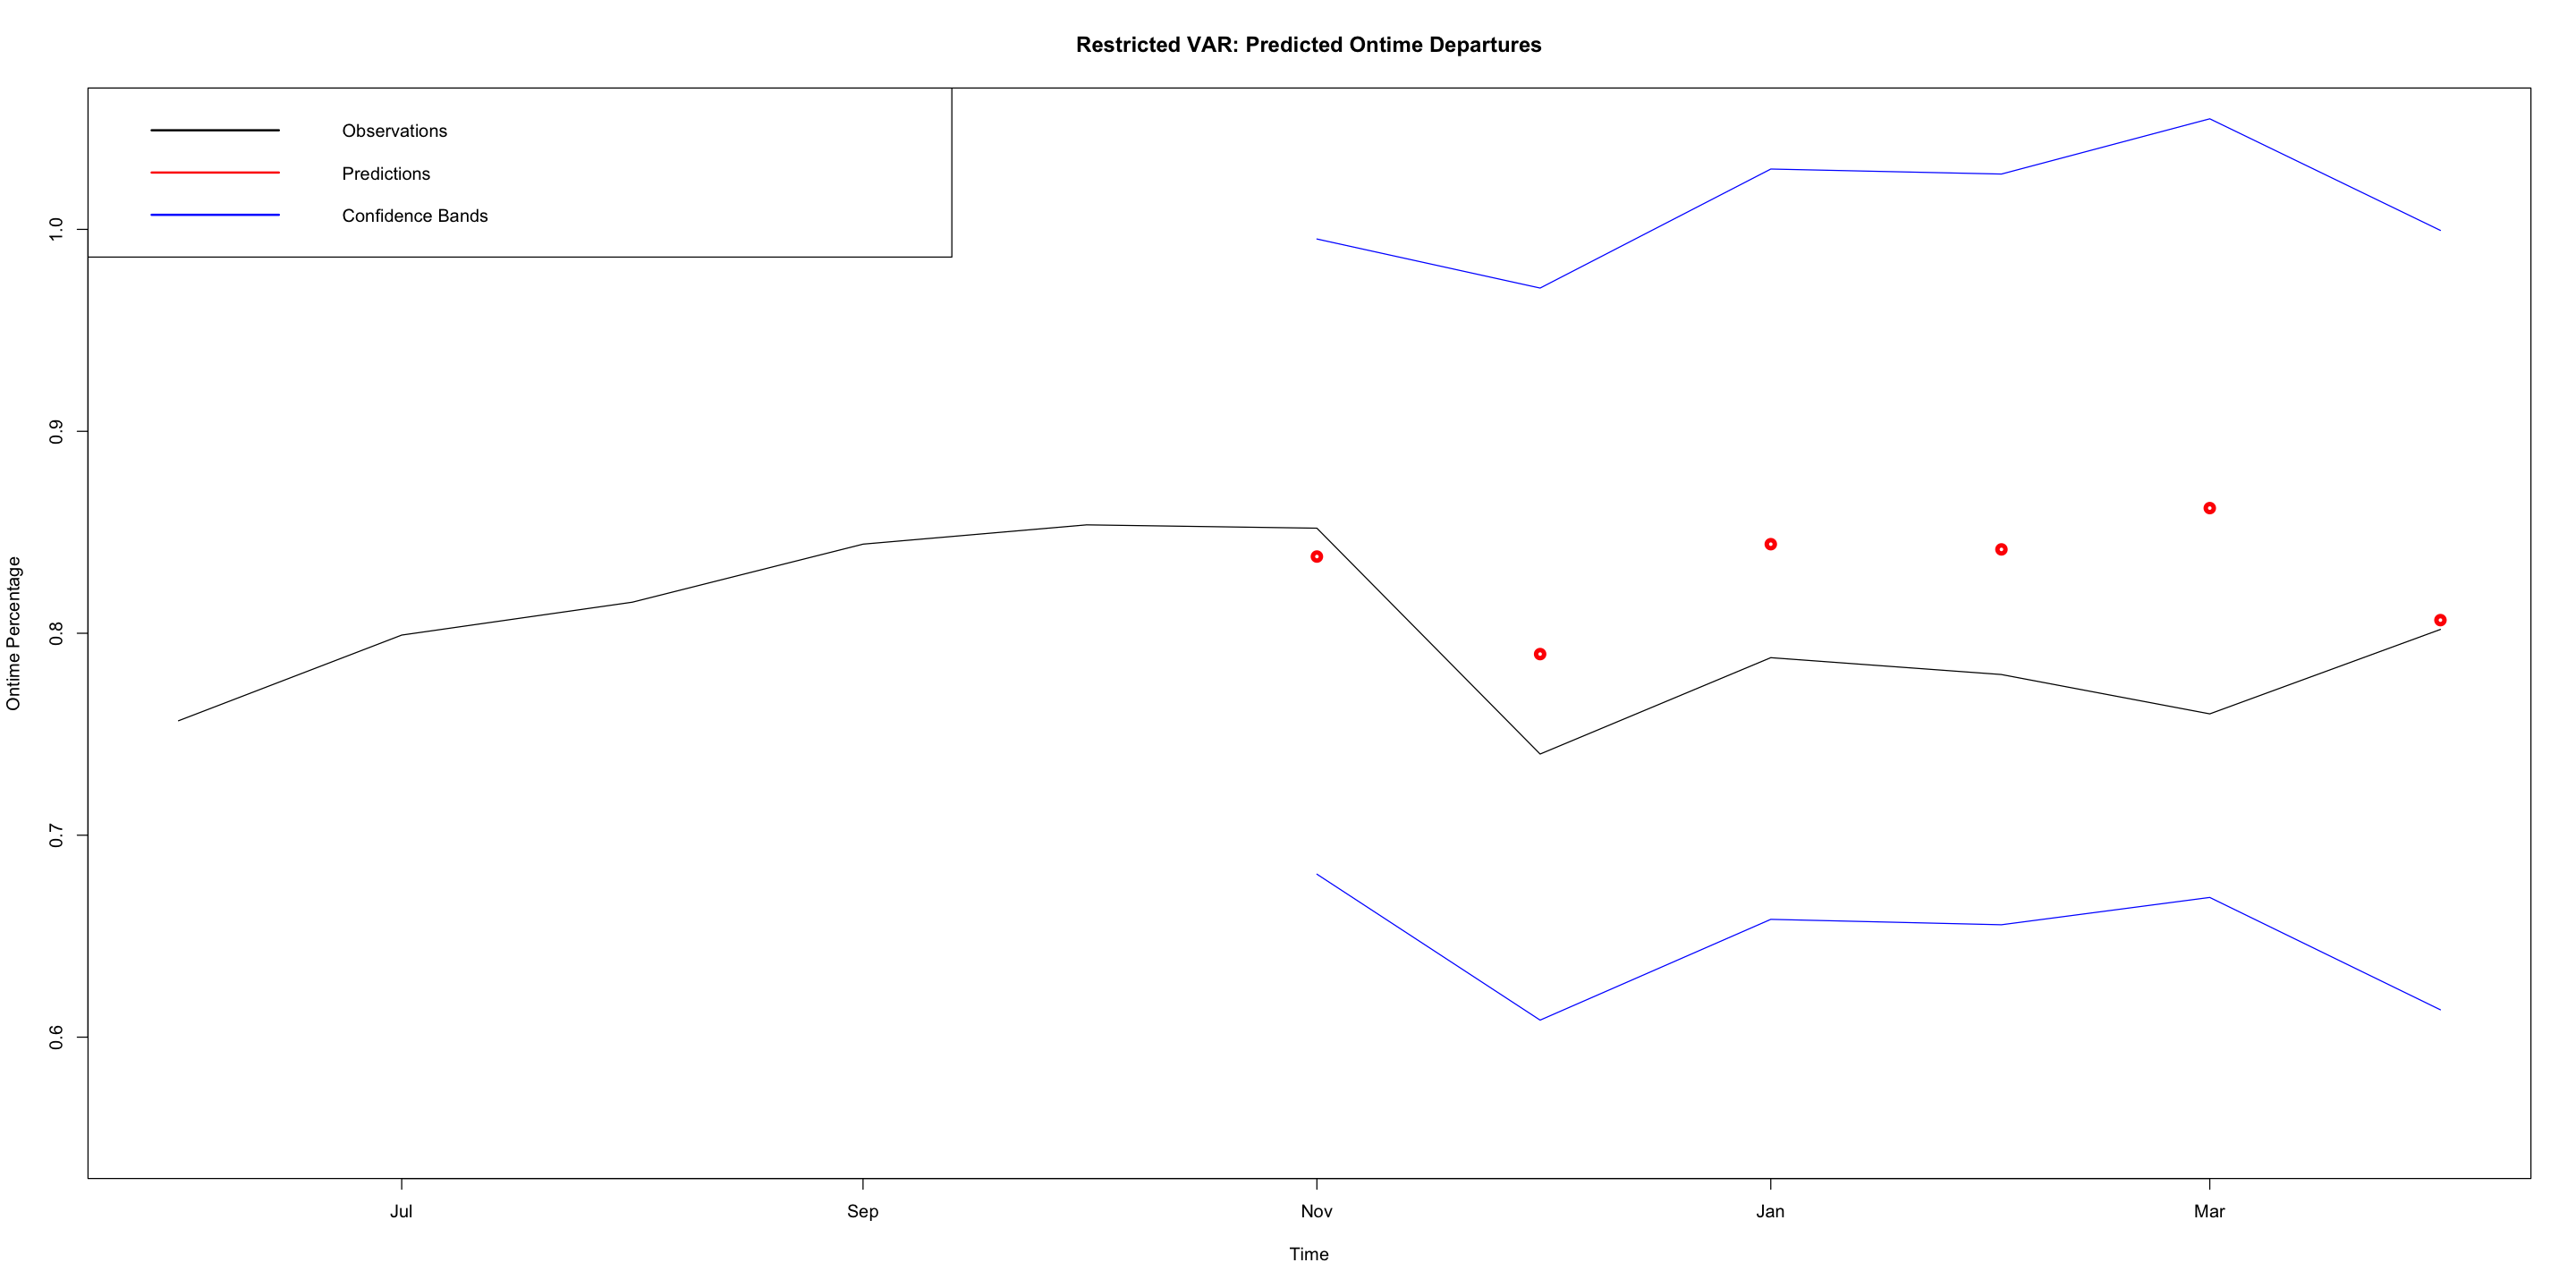

In [46]:
### Forecasting Results

# arrivals_ontime - Unrestricted VAR
a_full = ts(data[, c(4)], freq=12, start=c(1990,01,01))
a_cband = preds_a1[[1]]$arrivals_ontime[,4]

plot(as.Date(data$date[390:400]), a_full[390:400], type = "l", ylim = c(0.5,1.1), 
     xlab='Time', ylab = "Ontime Percentage", main='Unrestricted VAR: Predicted Ontime Arrivals')
points(as.Date(data$date[395:400]), a_finalPred_1, col = "red", lwd=4)
lines(as.Date(data$date[395:400]), a_finalPred_1 + 1.96*a_cband, col = "blue")
lines(as.Date(data$date[395:400]), a_finalPred_1 - 1.96*a_cband, col = "blue")
legend('topleft', legend = c("Observations", "Predictions", "Confidence Bands"),
       lwd = 2, col = c("black", "red", "blue"))

# departures_ontime - Restricted VAR
d_full = ts(data[, c(10)], freq=12, start=c(1990,01,01))
d_cband = preds_d[[1]]$departures_ontime[,4]

plot(as.Date(data$date[390:400]), d_full[390:400], type = "l", ylim = c(0.55,1.05), 
     xlab='Time', ylab = "Ontime Percentage", main='Restricted VAR: Predicted Ontime Departures')
points(as.Date(data$date[395:400]), d_finalPred, col = "red", lwd=4)
lines(as.Date(data$date[395:400]), d_finalPred + 1.96*d_cband, col = "blue")
lines(as.Date(data$date[395:400]), d_finalPred - 1.96*d_cband, col = "blue")
legend('topleft', legend = c("Observations", "Predictions", "Confidence Bands"),
       lwd = 2, col = c("black", "red", "blue"))

In [47]:
### Granger causality analysis - Unrestricted VAR

## arrivals_ontime
a_coef = coefficients(avar_model)$arrivals_ontime[-(4*3+1),1]
a_var = vcov(avar_model)[2:13,2:13]

# arrivals_delayed
wald.test(b=a_coef, a_var, Terms=seq(2, 4*3, 3))

# arrivals_cancelled
wald.test(b=a_coef, a_var, Terms=seq(3, 4*3, 3))

## departures_ontime
d_coef = coefficients(dvar_model)$departures_ontime[-(20*3+1),1]
d_var = vcov(dvar_model)[2:61,2:61]

# departures_delayed
wald.test(b=d_coef, d_var, Terms=seq(2, 20*3, 3))

# departures_cancelled
wald.test(b=d_coef, d_var, Terms=seq(3, 20*3, 3))

Wald test:
----------

Chi-squared test:
X2 = 14.4, df = 4, P(> X2) = 0.006

Wald test:
----------

Chi-squared test:
X2 = 14.7, df = 4, P(> X2) = 0.0054

Wald test:
----------

Chi-squared test:
X2 = 10.7, df = 20, P(> X2) = 0.95

Wald test:
----------

Chi-squared test:
X2 = 10.7, df = 20, P(> X2) = 0.95

**Interpretation:**

**Arrivals Ontime:** Since the p-values are less than 0.05, we reject the null hypothesis that the coefficients corresponding to the lagged time series are zero. This means that each of the coefficients listed here Granger cause the arrivals_ontime.

**Departures Ontime:** Since the p-values are greater than 0.05, we fail to reject the null hypothesis. This means that each of the coefficients listed here DO NOT Granger cause the departures_ontime.

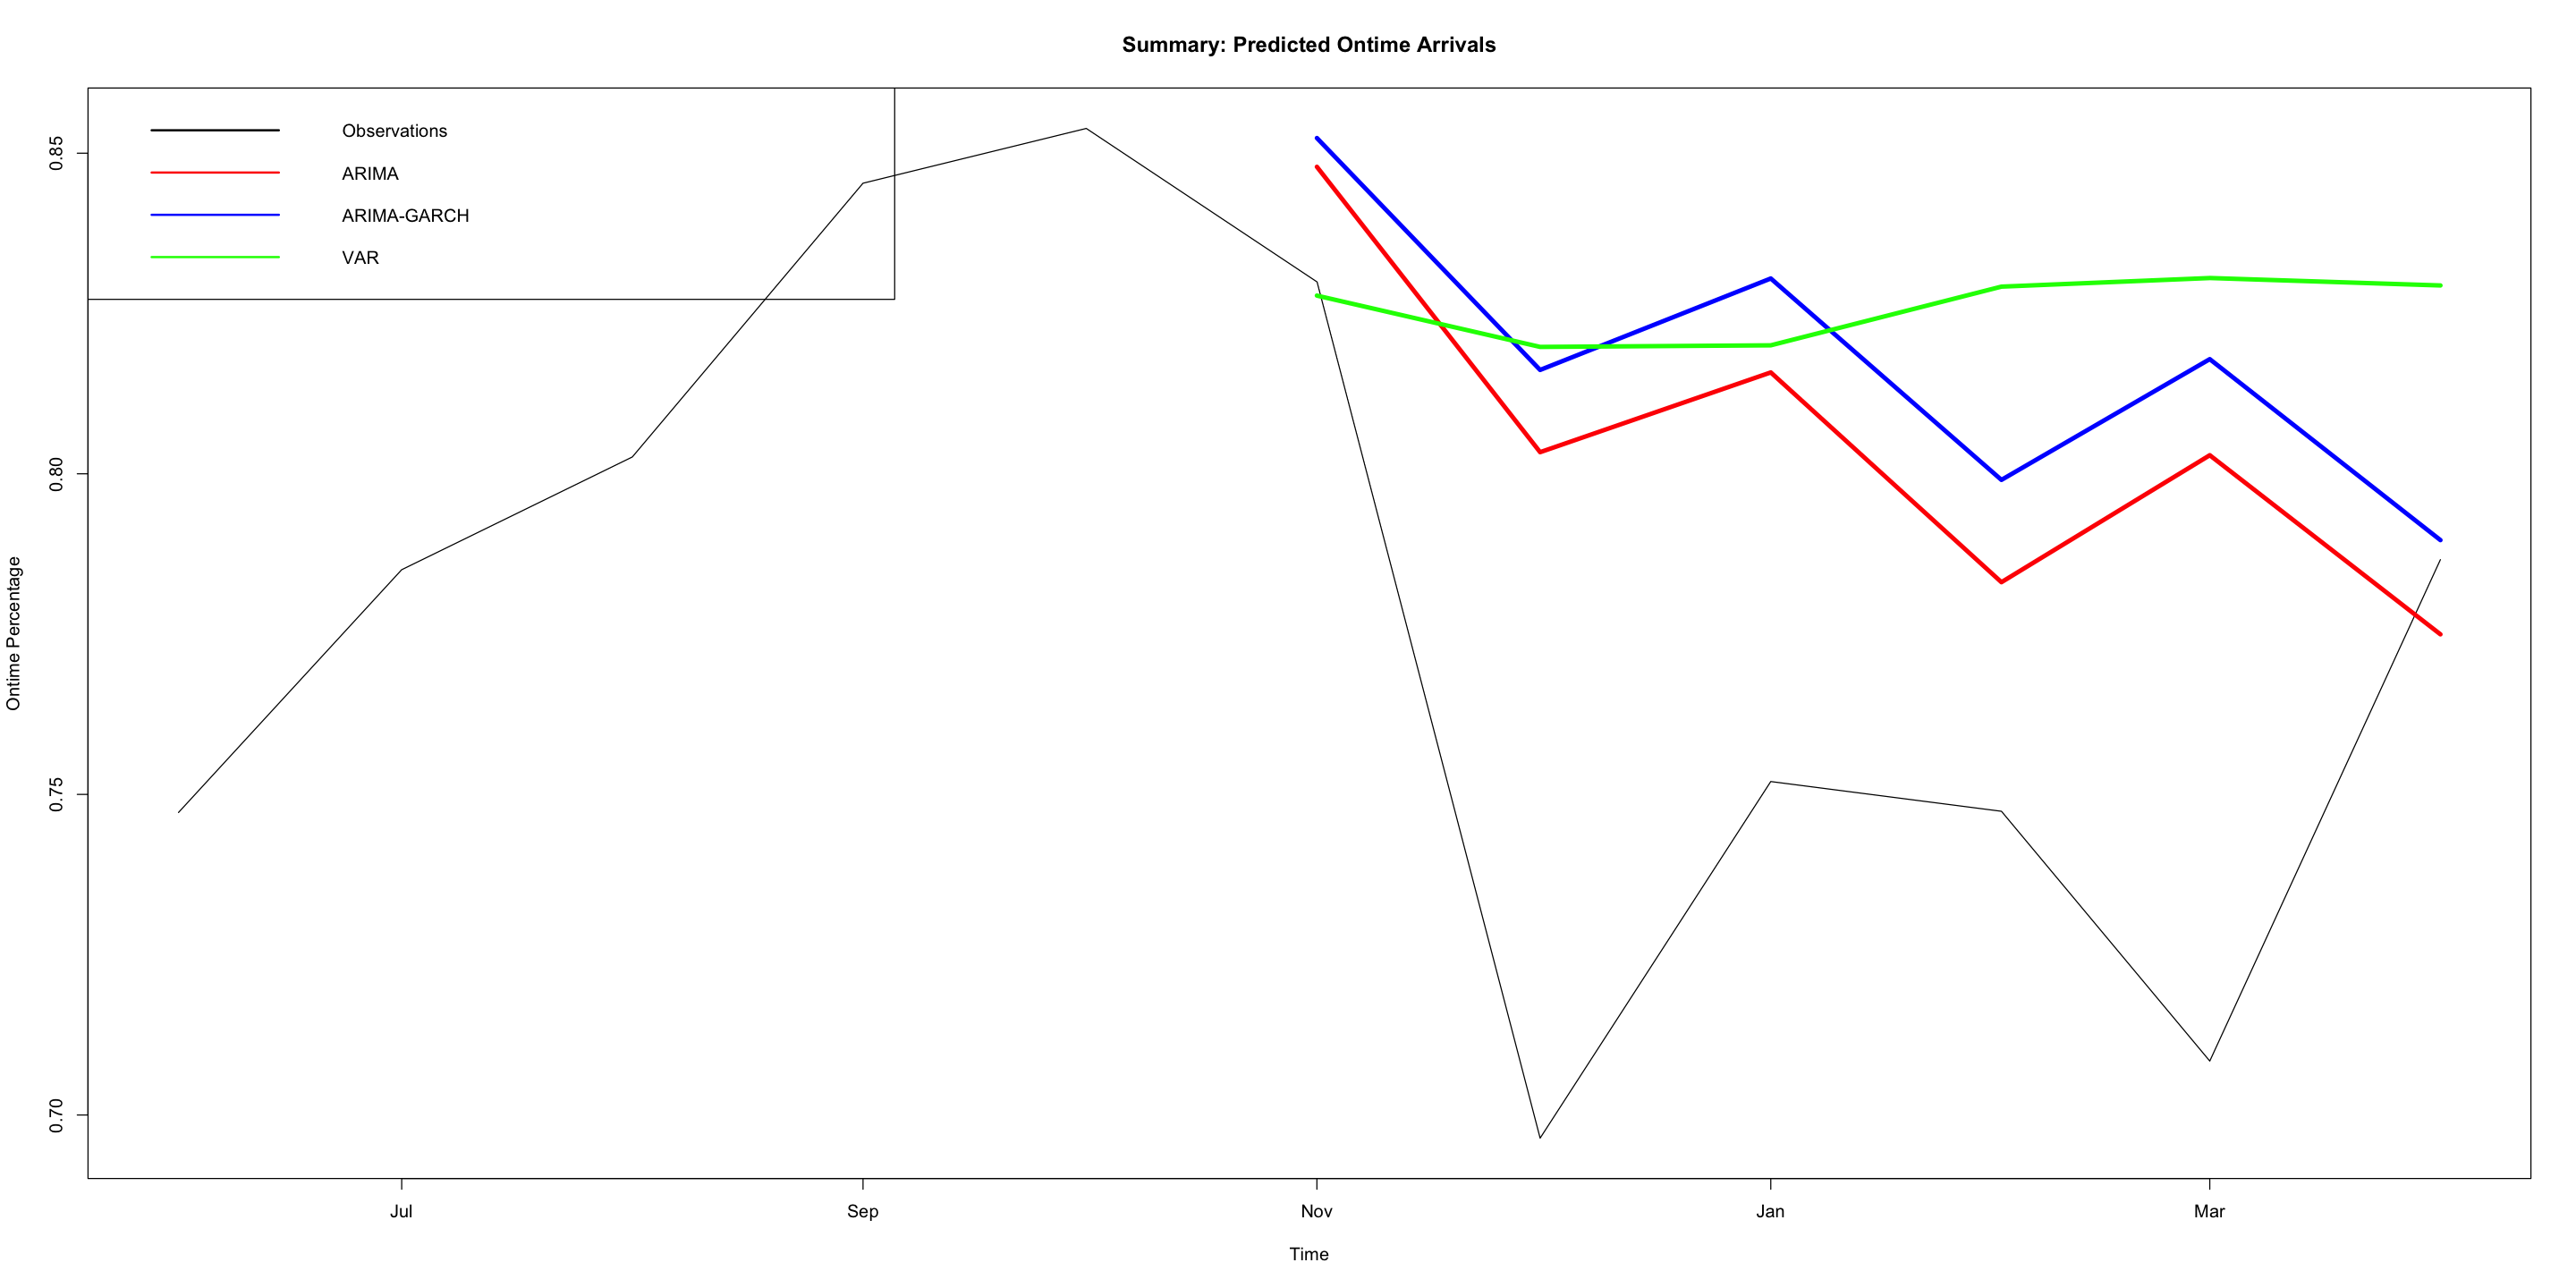

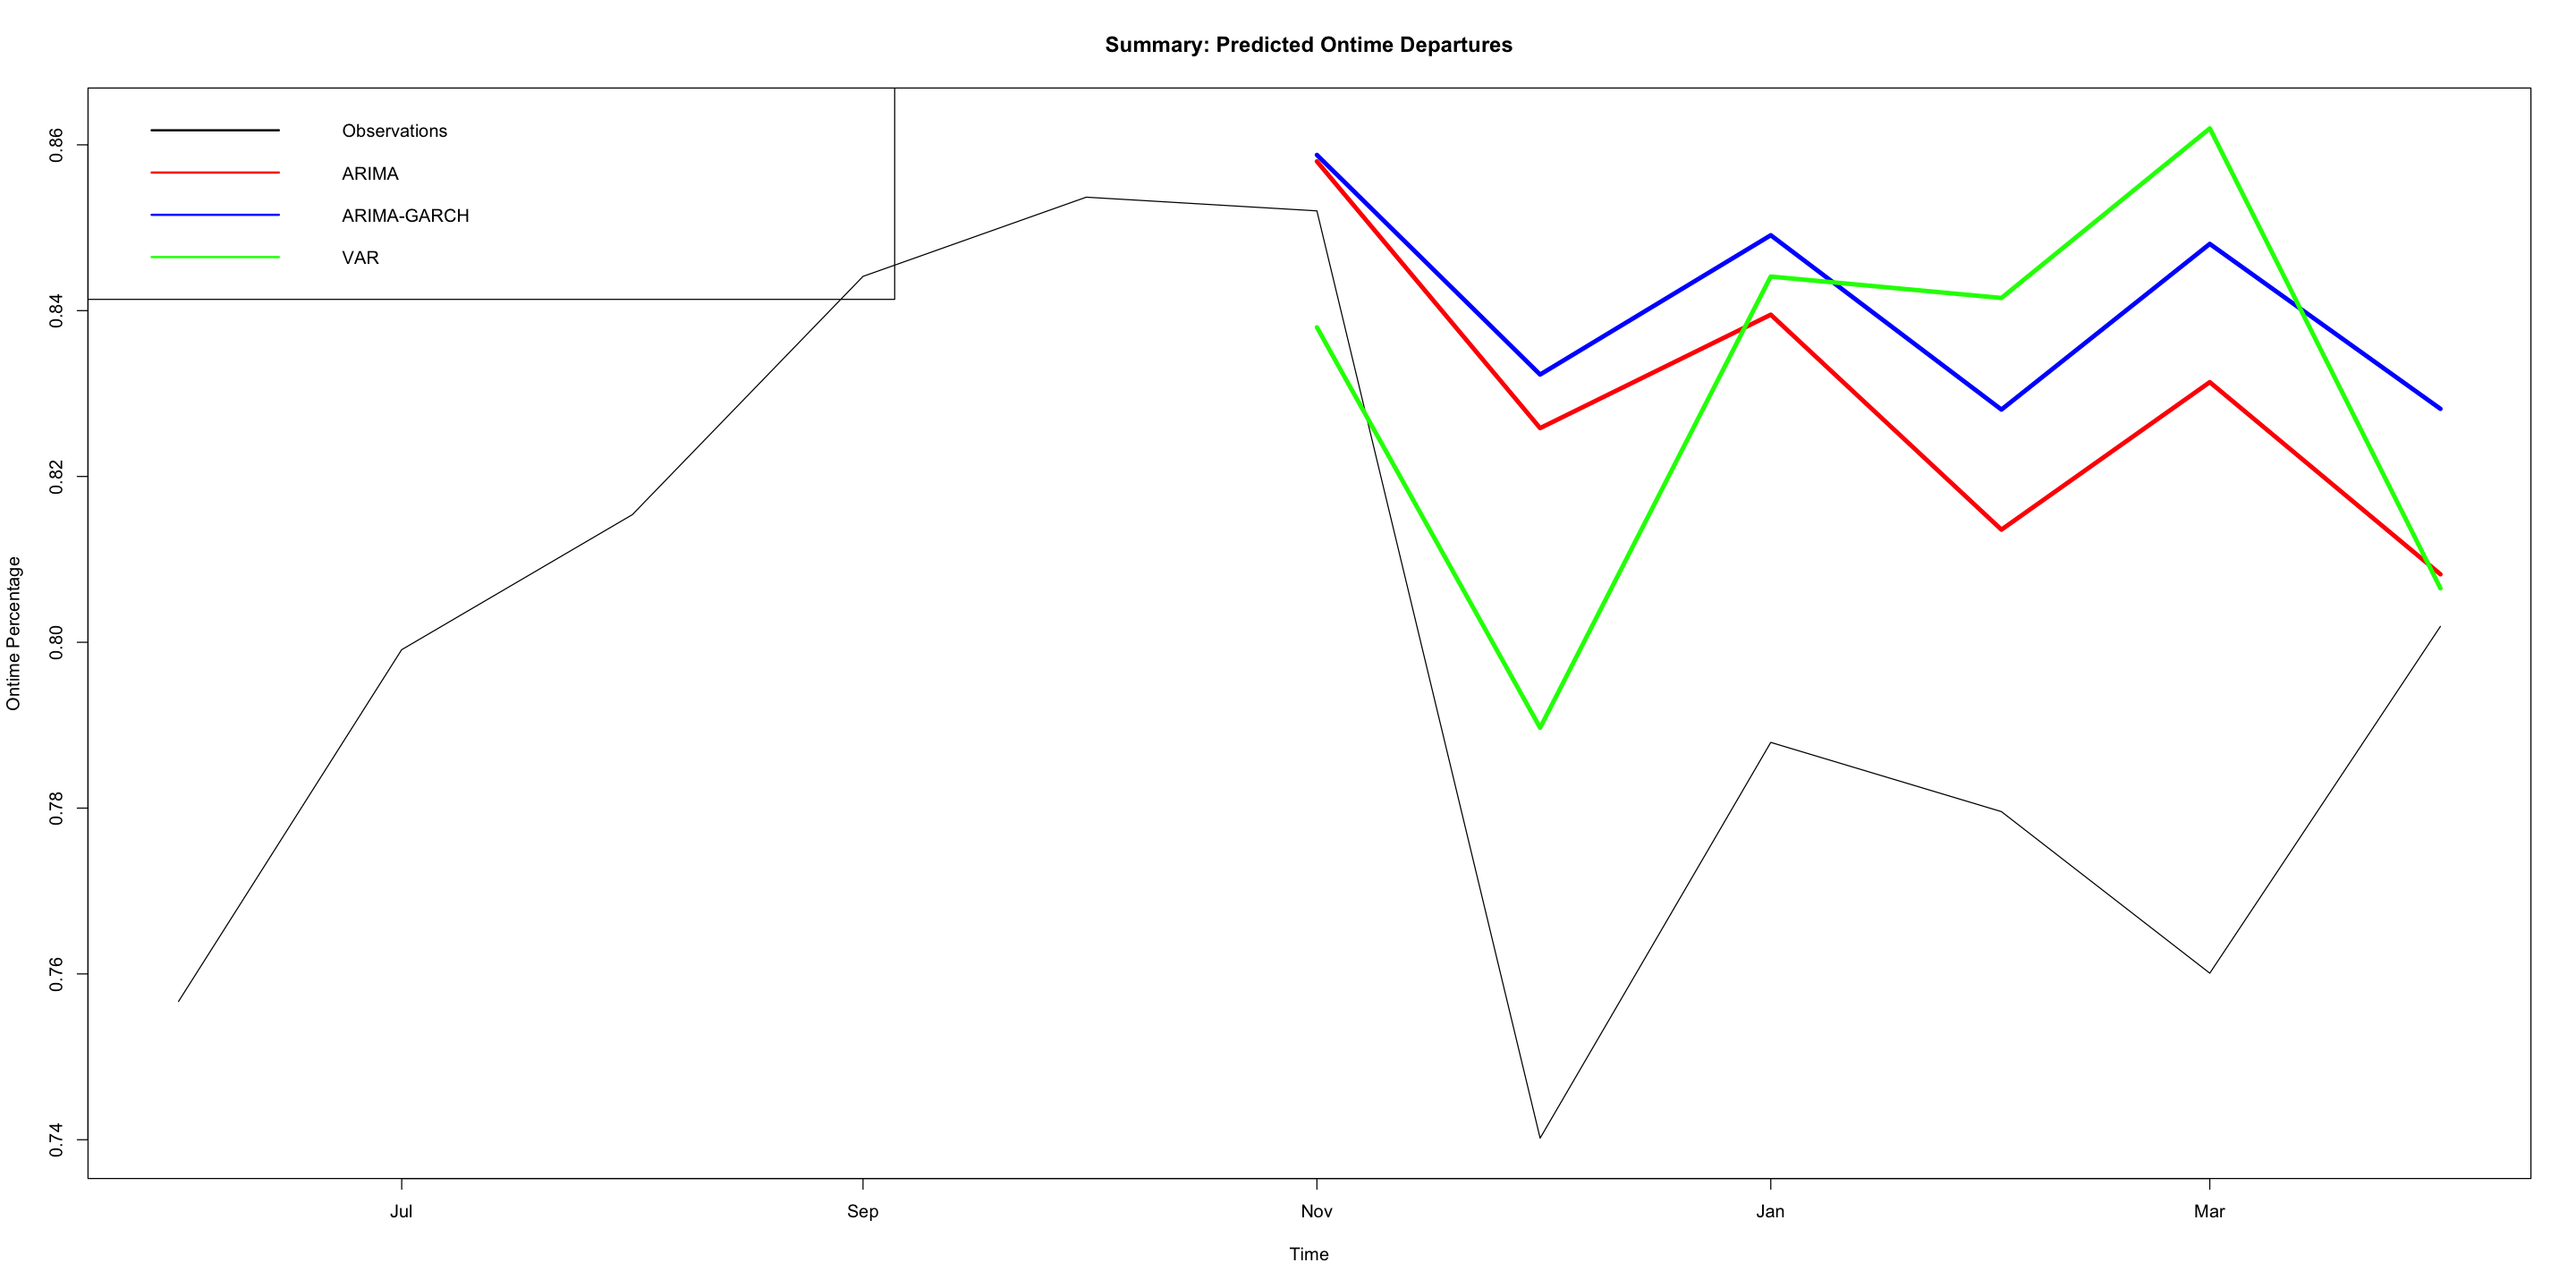

In [48]:
### Summary

# arrivals_ontime
y_min = min(a_full[390:400], a_preds$pred, agarch_fore, a_finalPred_1)
y_max = max(a_full[390:400], a_preds$pred, agarch_fore, a_finalPred_1)
plot(as.Date(data$date[390:400]), a_full[390:400], type = "l", ylim = c(y_min, y_max), 
     xlab='Time', ylab = "Ontime Percentage", main='Summary: Predicted Ontime Arrivals')
lines(as.Date(data$date[395:400]), a_preds$pred, col = "red", lwd=4)
lines(as.Date(data$date[395:400]), agarch_fore, col = "blue", lwd=4)
lines(as.Date(data$date[395:400]), a_finalPred_1, col = "green", lwd=4)
legend('topleft', legend = c("Observations", "ARIMA", "ARIMA-GARCH", "VAR"),
       lwd = 2, col = c("black", "red", "blue", "green"))

# departures_ontime
y_min_1 = min(d_full[390:400], d_preds$pred, dgarch_fore, d_finalPred)
y_max_1 = max(d_full[390:400], d_preds$pred, dgarch_fore, d_finalPred)
plot(as.Date(data$date[390:400]), d_full[390:400], type = "l", ylim = c(y_min_1, y_max_1), 
     xlab='Time', ylab = "Ontime Percentage", main='Summary: Predicted Ontime Departures')
lines(as.Date(data$date[395:400]), d_preds$pred, col = "red", lwd=4)
lines(as.Date(data$date[395:400]), dgarch_fore, col = "blue", lwd=4)
lines(as.Date(data$date[395:400]), d_finalPred, col = "green", lwd=4)
legend('topleft', legend = c("Observations", "ARIMA", "ARIMA-GARCH", "VAR"),
       lwd = 2, col = c("black", "red", "blue", "green"))

### Summary


**Univariate ARIMA**

Arrivals ontime MAPE:  0.07791709

Arrivals ontime MSE:  0.004811854

Arrivals on time PM:  2.35236

-------------------------------------- 

Departures ontime MAPE:  0.05542753

Departures ontime MSE:  0.002493613

Departures ontime PM:  2.015545

-------------------------------------- 

**Univariate ARIMA-GARCH**

Arrivals ontime MAPE:  0.08848919 

Arrivals ontime MSE:  0.005945786 

Arrivals on time PM:  2.906702 

-------------------------------------- 

Departures ontime MAPE:  0.07822434 

Departures ontime MSE:  0.004700787 

Departures ontime PM:  3.799565

-------------------------------------- 

**Multivariate VAR - Unrestricted**

Arrivals ontime MAPE:  0.1010805

Arrivals ontime MSE:  0.00721621

Arrivals on time PM:  3.527771

-------------------------------------- 

Departures ontime MAPE:  0.06373908 

Departures ontime MSE:  0.003478339 

Departures ontime PM:  2.811481

-------------------------------------- 

**Multivariate VAR - Restricted**

Arrivals ontime MAPE:  0.1871917 

Arrivals ontime MSE:  0.02402257 

Arrivals on time PM:  11.74386 

-------------------------------------- 

Departures ontime MAPE:  0.06232115

Departures ontime MSE:  0.003340975

Departures ontime PM:  2.700452